# 1-understanding data

In this notebook we will create a classification model to determine if restaurant is good or no, based on the rate column, 
we will start by going through a complete Data Analysis on Zomato Restaurants dataset available on Kaggle. 
- Go through the data;
- perform an exploratory data analysis;
- Point out conclusions in every step of analysis;
- data visualization (matplotlib and seaborn) to answear questions;
- Apply a predictive point of view for helping people to choose the best restaurant.
- Using this predictive approach for predicting the success of a new restaurant in Bengaluru.

# 2-import libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
from collections import Counter
from PIL import Image

# Viz libs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
#from mpl_toolkits.axes_grid.inset_locator import InsetPosition
import folium
from folium.plugins import HeatMap, FastMarkerCluster
from wordcloud import WordCloud

# Geolocation libs
from geopy.geocoders import Nominatim

# ML libs
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 3- data Exploration

In [2]:
df= pd.read_csv("zomato.csv")

In [3]:
df["location"].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [4]:
df["listed_in(city)"].value_counts()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: listed_in(city), dtype: int64

In [6]:
df["rest_type"].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [7]:
df["dish_liked"].value_counts()

Biryani                                                                                              182
Chicken Biryani                                                                                       73
Friendly Staff                                                                                        69
Waffles                                                                                               68
Paratha                                                                                               57
                                                                                                    ... 
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani      1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                   1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri Chicken Salad, Potato Wedges, Rolls             1
Chaat, Pav Bhaji, Raj Kachori, Buttermilk, Ajwaini Para

In [8]:
df["cuisines"].value_counts()

North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2723, dtype: int64

In [20]:
df["listed_in(type)"].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [6]:
df["menu_item"].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [10]:
df["name"].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

In [9]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
# Assuming your DataFrame is named 'df'
duplicates = df.T.duplicated()

# Get the duplicate column names
duplicate_columns = df.columns[duplicates]

# Print the duplicate column names
print(duplicate_columns)

Index([], dtype='object')


In [12]:
import pandas as pd

# Assuming your DataFrame is named 'df'
duplicate_columns = df.transpose()[df.transpose().duplicated()].index

if len(duplicate_columns) > 0:
    print("Duplicate columns found:")
    print(duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate columns found.


url: useless

address: use it in map to determine location (but format is not accurate) 
name: names have been repeated many times, so we will use groupby to search some data about each rest.
    
online-order: yes and no 
book-table: yes and no
rate: extract exact rate
votes: numerical data (will not be used in model as it is future data)
phone: numerical data will not use it (irrelevant data)
location: use it in map and in categorizing data
rest-type: visualize all types and see most commen type
dish_liked: visualize it by wordcloud
cuisines: 
approx-cost(for two people): how much expensive
reviews_list: another rate + text comment (reduntant data , mostly delete it, can be used in deep learning)
menu_item: used only in word cloud
listed_in(type): type of meals (word cloud)
listed_in(city): name of city, used for model and for data analysis by grouping (30 cities)

let us explore unique values of some columns

In [9]:
df["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df["book_table"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [12]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [13]:
df["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# 4-data cleaning:

work with missing data
work with categorical data
no outliers here



In [15]:
#work with missing data
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [27]:
# work on approx cost to change it into numerical data
# extract rate from rate column

start to change data types from object to float and to prepare some data

    approx_cost(for two people): Change the data type from object to float;

    rate: eliminate the "/5" text and change data type from object to float

In [13]:
# Changing the data type from approx_cost columns
df['approx_cost'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
df['approx_cost'] = df['approx_cost'].astype(float)

# Extracting the rate in a float column
df['rate_num'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0])
while True:
    try:
        df['rate_num'] = df['rate_num'].astype(float)
        break
    except ValueError as e1:
        noise_entry = str(e1).split(":")[-1].strip().replace("'", "")
        print(f'Threating noisy entrance on rate: {noise_entry}')
        df['rate_num'] = df['rate_num'].apply(lambda x: x.replace(noise_entry, str(np.nan)))


# Dropping old columns
df.drop(['approx_cost(for two people)', 'rate'], axis=1, inplace=True)
df.head()

Threating noisy entrance on rate: NEW
Threating noisy entrance on rate: -


,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),approx_cost,rate_num
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,800.0,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,800.0,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,800.0,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,300.0,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,600.0,3.8


# 5- data analysis & visualization

### univariant analysis + visualization

count plot to online order restaurants and book a table restaurants

In [14]:
histo = df.groupby('name')['address'].count()
# Lets take the top 50 restaurantsand plot bar graph
histo = histo.sort_values()[-50:]
histo

name
Biggies Burger 'n' More      43
Chaai Resto                  43
XO Belgian Waffle            44
Lassi Corner                 44
New Prashanth Hotel          44
Krispy Kreme                 45
Mainland China               45
Gelato Italiano              46
Goli Vada Pav No. 1          46
Mani's Dum Biryani           47
Hammered                     47
Donne Biriyani Mane          47
California Burrito           48
The Chocolate Heaven         48
A2B - Adyar Ananda Bhavan    50
Sweet Chariot                50
Chung Wah                    50
eat.fit                      50
Pizza Stop                   50
Frozen Bottle                51
Rolls On Wheels              51
Lakeview Milkbar             52
Tata Cha                     52
Corner House Ice Cream       52
Ambur Hot Dum Biryani        53
The French Loaf              53
Smally's Resto Cafe          54
Keventers                    54
Burger King                  55
Lassi Shop                   56
Faasos                       57
Cha

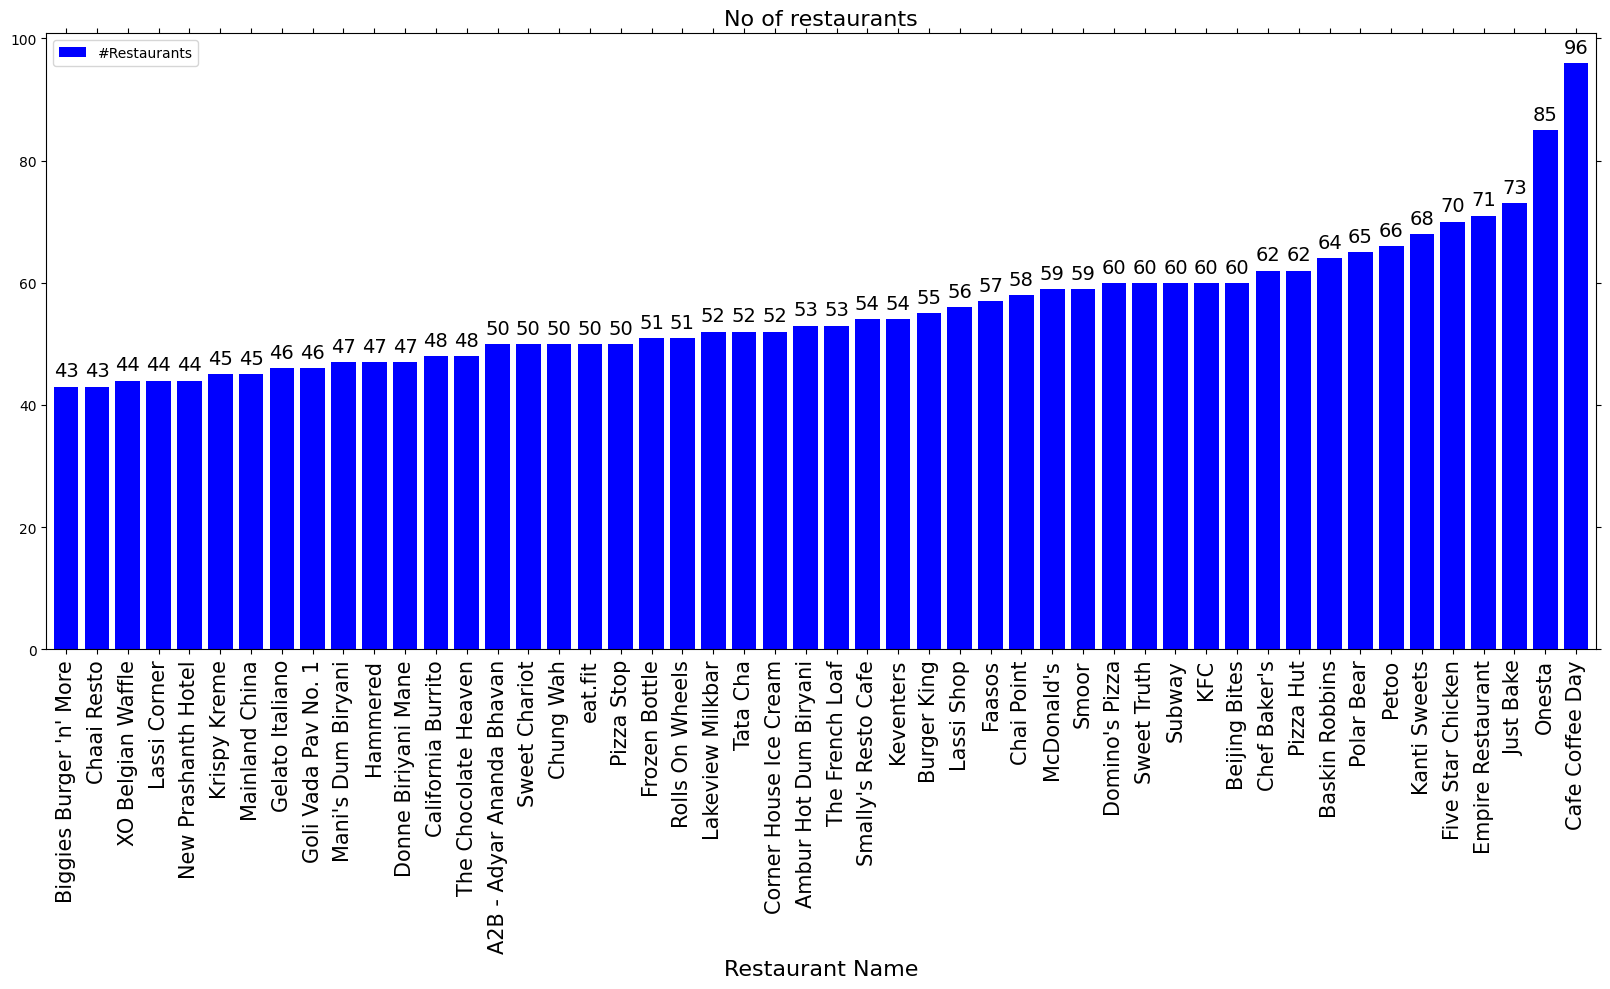

In [15]:
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Restaurant Name', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

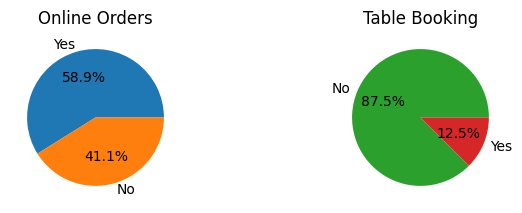

In [16]:
# Get the counts of online orders and table booking
online_order_counts = df['online_order'].value_counts()
table_booking_counts = df['book_table'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first pie chart in the first subplot
ax1.pie(online_order_counts, labels=online_order_counts.index, colors=['#1f77b4', '#ff7f0e'], autopct='%1.1f%%')
ax1.set_title('Online Orders')

# Plot the second pie chart in the second subplot
ax2.pie(table_booking_counts, labels=table_booking_counts.index, colors=['#2ca02c', '#d62728'], autopct='%1.1f%%')
ax2.set_title('Table Booking')

# Set the layout of the subplots
fig.subplots_adjust(wspace=0.9)

# Show the plots
plt.show()


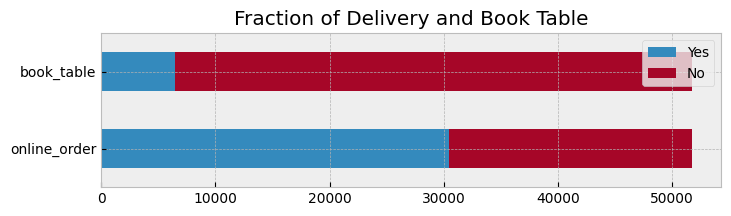

In [74]:
with plt.style.context('bmh', after_reset = True):
    plt.figure(figsize = (8,2))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['online_order', 'book_table']: 
        tmp[col] = df[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)
    ax.set_title('Fraction of Delivery and Book Table')
    plt.show()


votes: non significant count

phone: irrelevant data

rest_types: there are many types of restaurants, plot types of restaurants 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              51717 non-null  object 
 1   address          51717 non-null  object 
 2   name             51717 non-null  object 
 3   online_order     51717 non-null  object 
 4   book_table       51717 non-null  object 
 5   votes            51717 non-null  int64  
 6   phone            50509 non-null  object 
 7   location         51696 non-null  object 
 8   rest_type        51490 non-null  object 
 9   dish_liked       23639 non-null  object 
 10  cuisines         51672 non-null  object 
 11  reviews_list     51717 non-null  object 
 12  menu_item        51717 non-null  object 
 13  listed_in(type)  51717 non-null  object 
 14  listed_in(city)  51717 non-null  object 
 15  approx_cost      51371 non-null  float64
 16  rate_num         41665 non-null  float64
dtypes: float64(2

In [22]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [23]:
replacement_mapping = {
    'Cafe, Casual Dining': 'Casual Dining, Cafe',
    'Bakery, Cafe': 'Cafe, Bakery',
    'Dessert Parlor, Cafe': 'Cafe, Dessert Parlor',
    'Cafe, Quick Bites': 'Quick Bites, Cafe',
    'Lounge, Cafe': 'Cafe, Lounge',
    'Dessert Parlor, Quick Bites': 'Quick Bites, Dessert Parlor',
    'Dessert Parlor, Beverage Shop': 'Beverage Shop, Dessert Parlor',
    'Dessert Parlor, Sweet Shop': 'Sweet Shop, Dessert Parlor',
    'Beverage Shop, Quick Bites': 'Quick Bites, Beverage Shop',
    'Food Court, Quick Bites': 'Quick Bites, Food Court',
    'Quick Bites, Mess': 'Mess, Quick Bites',
    'Casual Dining, Lounge': 'Lounge, Casual Dining',
    'Lounge, Bar': 'Bar, Lounge',
    'Lounge, Cafe': 'Cafe, Lounge',
    'Lounge, Microbrewery': 'Microbrewery, Lounge',
    'Takeaway, Delivery': 'Delivery',
    'Takeaway': 'Delivery',
    'Bakery, Quick Bites': 'Quick Bites, Bakery',
    'Cafe, Bakery': 'Bakery, Cafe',
    'Bakery, Dessert Parlor': 'Dessert Parlor, Bakery',
    'Microbrewery, Casual Dining': 'Casual Dining, Microbrewery',
    'Microbrewery, Pub': 'Pub, Microbrewery',
    'Pub, Casual Dining': 'Casual Dining, Pub',
    'Microbrewery, Casual Dining': 'Casual Dining, Microbrewery',
    'Casual Dining, Bar': 'Bar, Casual Dining',
    'Cafe, Bar': 'Bar, Cafe',
    'Bar, Pub': 'Pub, Bar',
    'Sweet Shop, Quick Bites': 'Quick Bites, Sweet Shop',
    'Food Court, Dessert Parlor': 'Dessert Parlor, Food Court',
    'Pub, Casual Dining': 'Casual Dining, Pub',
    'Pub, Bar': 'Bar, Pub'
}

df = df.replace({'rest_type': replacement_mapping})

In [24]:
df['rest_type'].value_counts()

Quick Bites                  19132
Casual Dining                10330
Delivery                      4761
Cafe                          3732
Dessert Parlor                2263
                             ...  
Cafe, Food Court                 2
Dessert Parlor, Kiosk            2
Bakery, Food Court               2
Food Court, Beverage Shop        2
Quick Bites, Kiosk               1
Name: rest_type, Length: 69, dtype: int64

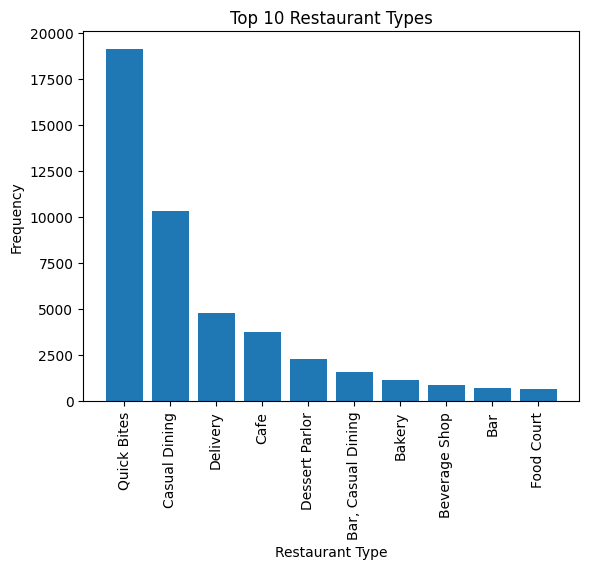

In [25]:
# Count the frequency of each type of restaurant
rest_type_counts = df['rest_type'].value_counts()

# Get the top 10 most common types of restaurants
top_10_rest_types = rest_type_counts.head(10)

# Create a bar chart of the top 10 restaurant types
plt.bar(top_10_rest_types.index, top_10_rest_types.values)
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


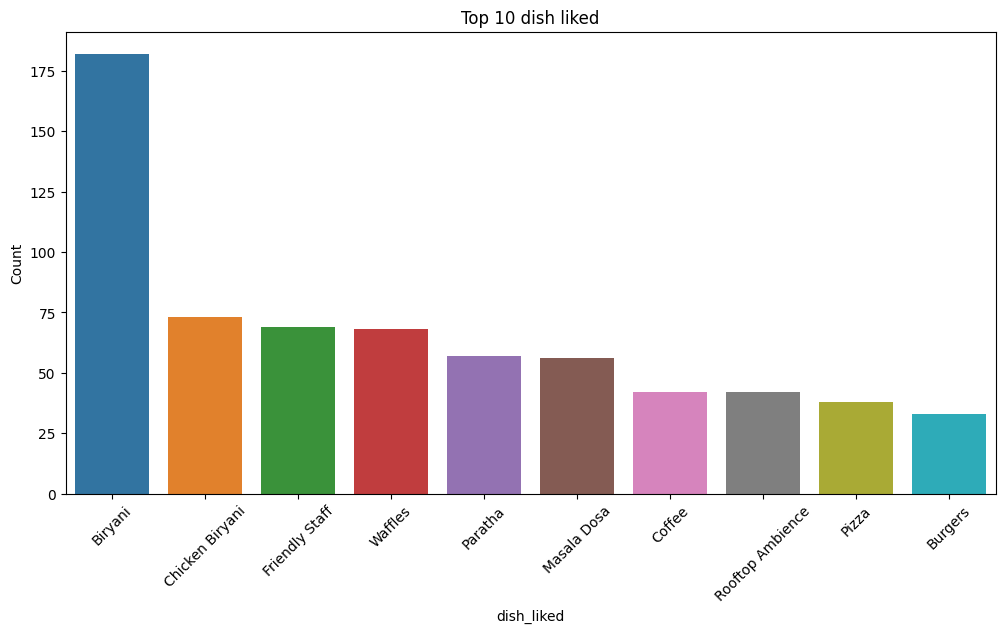

In [26]:
#data explore
dish_liked_count = df['dish_liked'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=dish_liked_count.index, y=dish_liked_count.values)
plt.xlabel('dish_liked')
plt.ylabel('Count')
plt.title('Top 10 dish liked')
plt.xticks(rotation=45)
plt.show()

In [77]:
#distribution of cuisines

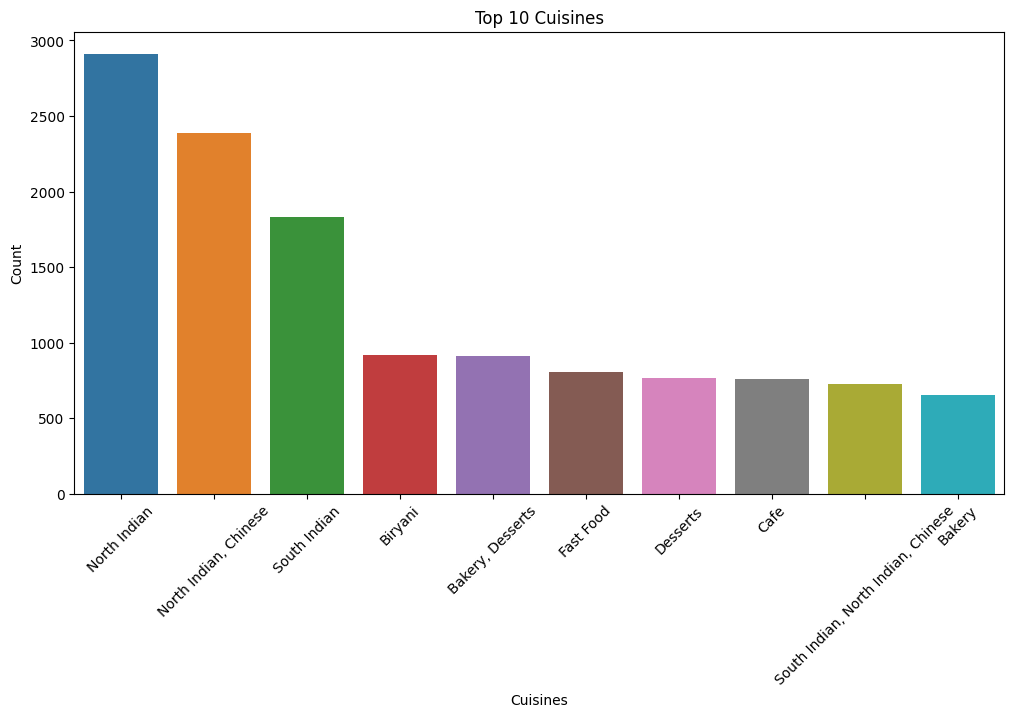

In [27]:
#data explore
cuisines_count = df['cuisines'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisines_count.index, y=cuisines_count.values)
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Top 10 Cuisines')
plt.xticks(rotation=45)
plt.show()

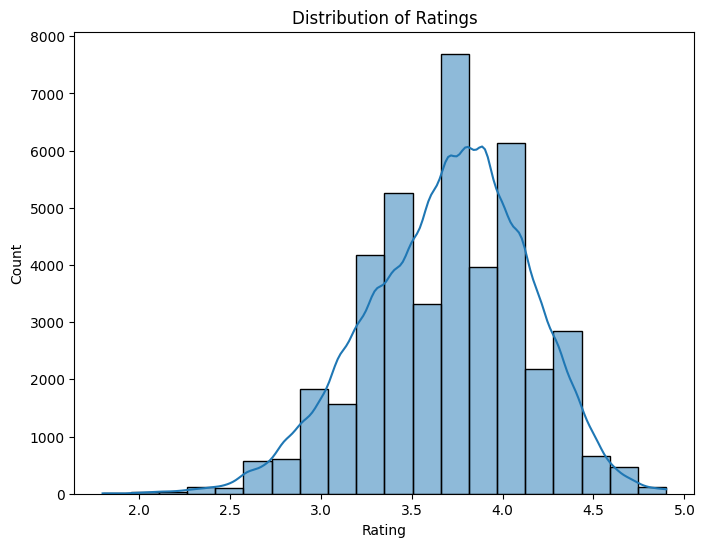

In [28]:
# distribution of rating
plt.figure(figsize=(8, 6))
sns.histplot(df['rate_num'], kde=True, bins=20)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

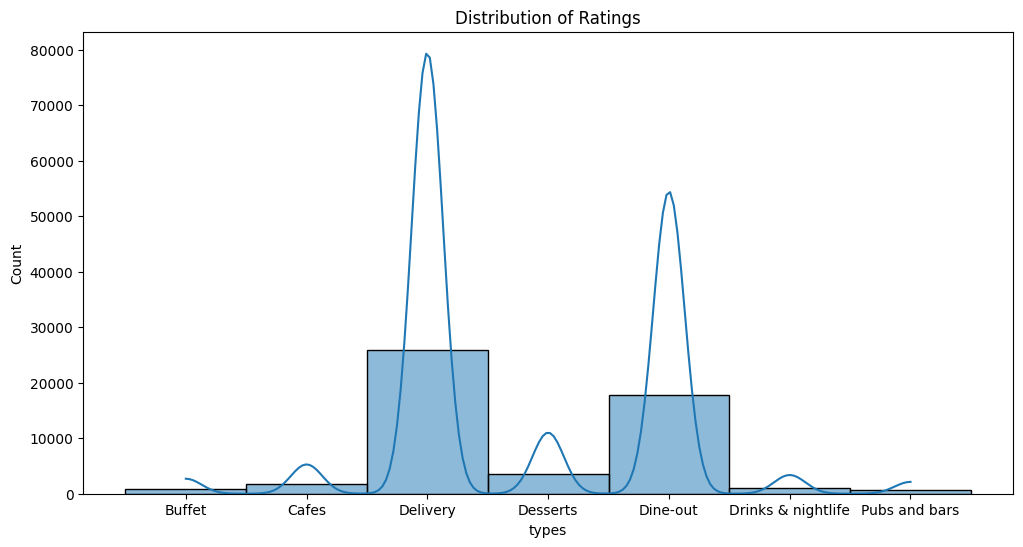

In [29]:
# distribution of types
plt.figure(figsize=(12, 6))
sns.histplot(df['listed_in(type)'], kde=True, bins=20)
plt.xlabel('types')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

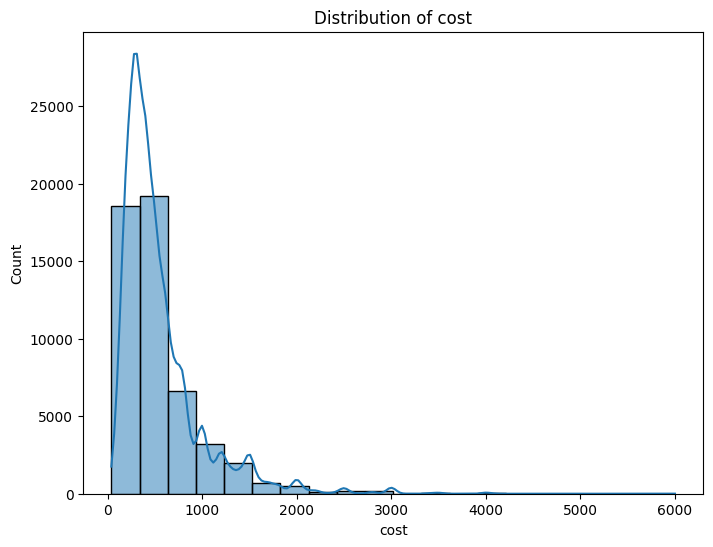

In [30]:
# distribution of costs
plt.figure(figsize=(8, 6))
sns.histplot(df['approx_cost'], kde=True, bins=20)
plt.xlabel('cost')
plt.ylabel('Count')
plt.title('Distribution of cost')
plt.show()

### bivariant analysis

groupby restauatrants name and see how many are there, total votes, mean cost, mean rate

In [31]:
# Group the data by restaurant name and calculate the number of units, total votes, mean approximate cost, and mean rating
grouped_df = df.groupby('name').agg({'votes': 'sum', 'approx_cost': 'mean', 'rate_num': 'mean', "address":"count"})

# Rename the 'address' column to 'units'
grouped_df = grouped_df.rename(columns={'address': 'units'})

# Sort the data by the number of units and get the top 20 "franchises"
top_20_franchises = grouped_df.sort_values(by='units', ascending=False).head(20)

# Print the top 10 "franchises" along with their total votes, mean approximate cost, and mean rating
print(top_20_franchises[['units', 'votes', 'approx_cost', 'rate_num']])

                   units   votes  approx_cost  rate_num
name                                                   
Cafe Coffee Day       96    3089   844.791667  3.256977
Onesta                85  347520   600.000000  4.410588
Just Bake             73    2898   400.000000  3.405970
Empire Restaurant     71  229808   685.211268  4.030435
Five Star Chicken     70    3134   257.857143  3.425000
Kanti Sweets          68    7336   400.000000  3.898529
Petoo                 66    4242   659.848485  3.833333
Polar Bear            65    8121   361.538462  4.031034
Baskin Robbins        64    2487   251.562500  3.572581
Chef Baker's          62    5073   516.071429  3.590909
Pizza Hut             62   20161   736.290323  3.376667
Domino's Pizza        60   18166   493.333333  3.561017
Sweet Truth           60    2115   500.000000  3.950000
Subway                60    8744   561.666667  3.474576
KFC                   60   23495   422.500000  3.648333
Beijing Bites         60   14984   755.000000  3

In [32]:
df.corr()

,votes,approx_cost,rate_num
votes,1.000000,0.381804,0.434040
approx_cost,0.381804,1.000000,0.385183
rate_num,0.434040,0.385183,1.000000


In [40]:
# Grouping data into location
good_ones = df.groupby(by='location', as_index=False).agg({'votes': 'sum',
                                                                       'url': 'count',
                                                                       'approx_cost': 'mean',
                                                                       'rate_num': 'mean'})
good_ones.columns = ['location', 'total_votes', 'total_unities', 'mean_approx_cost', 'mean_rate_num']
good_ones['votes_per_unity'] = good_ones['total_votes'] / good_ones['total_unities']
good_ones = good_ones.sort_values(by='total_unities', ascending=False)
good_ones = good_ones.loc[:, ['location', 'total_unities', 'total_votes', 'votes_per_unity',
                                                'mean_approx_cost', 'mean_rate_num']]
good_ones.head(10)

,location,total_unities,total_votes,votes_per_unity,mean_approx_cost,mean_rate_num
0,BTM,5124,619376,120.877440,396.480973,3.573740
22,HSR,2523,499720,198.065795,475.610048,3.672164
45,Koramangala 5th Block,2504,2219506,886.384185,663.663845,4.005821
29,JP Nagar,2235,586593,262.457718,522.771300,3.675306
89,Whitefield,2144,466829,217.737407,598.152836,3.621618
27,Indiranagar,2083,1196007,574.175228,653.788027,3.828154
32,Jayanagar,1926,488080,253.416407,476.407716,3.780280
56,Marathahalli,1846,445201,241.170639,513.750683,3.541927
3,Bannerghatta Road,1630,219077,134.403067,443.679654,3.507449
6,Bellandur,1286,206027,160.207621,527.503888,3.525692


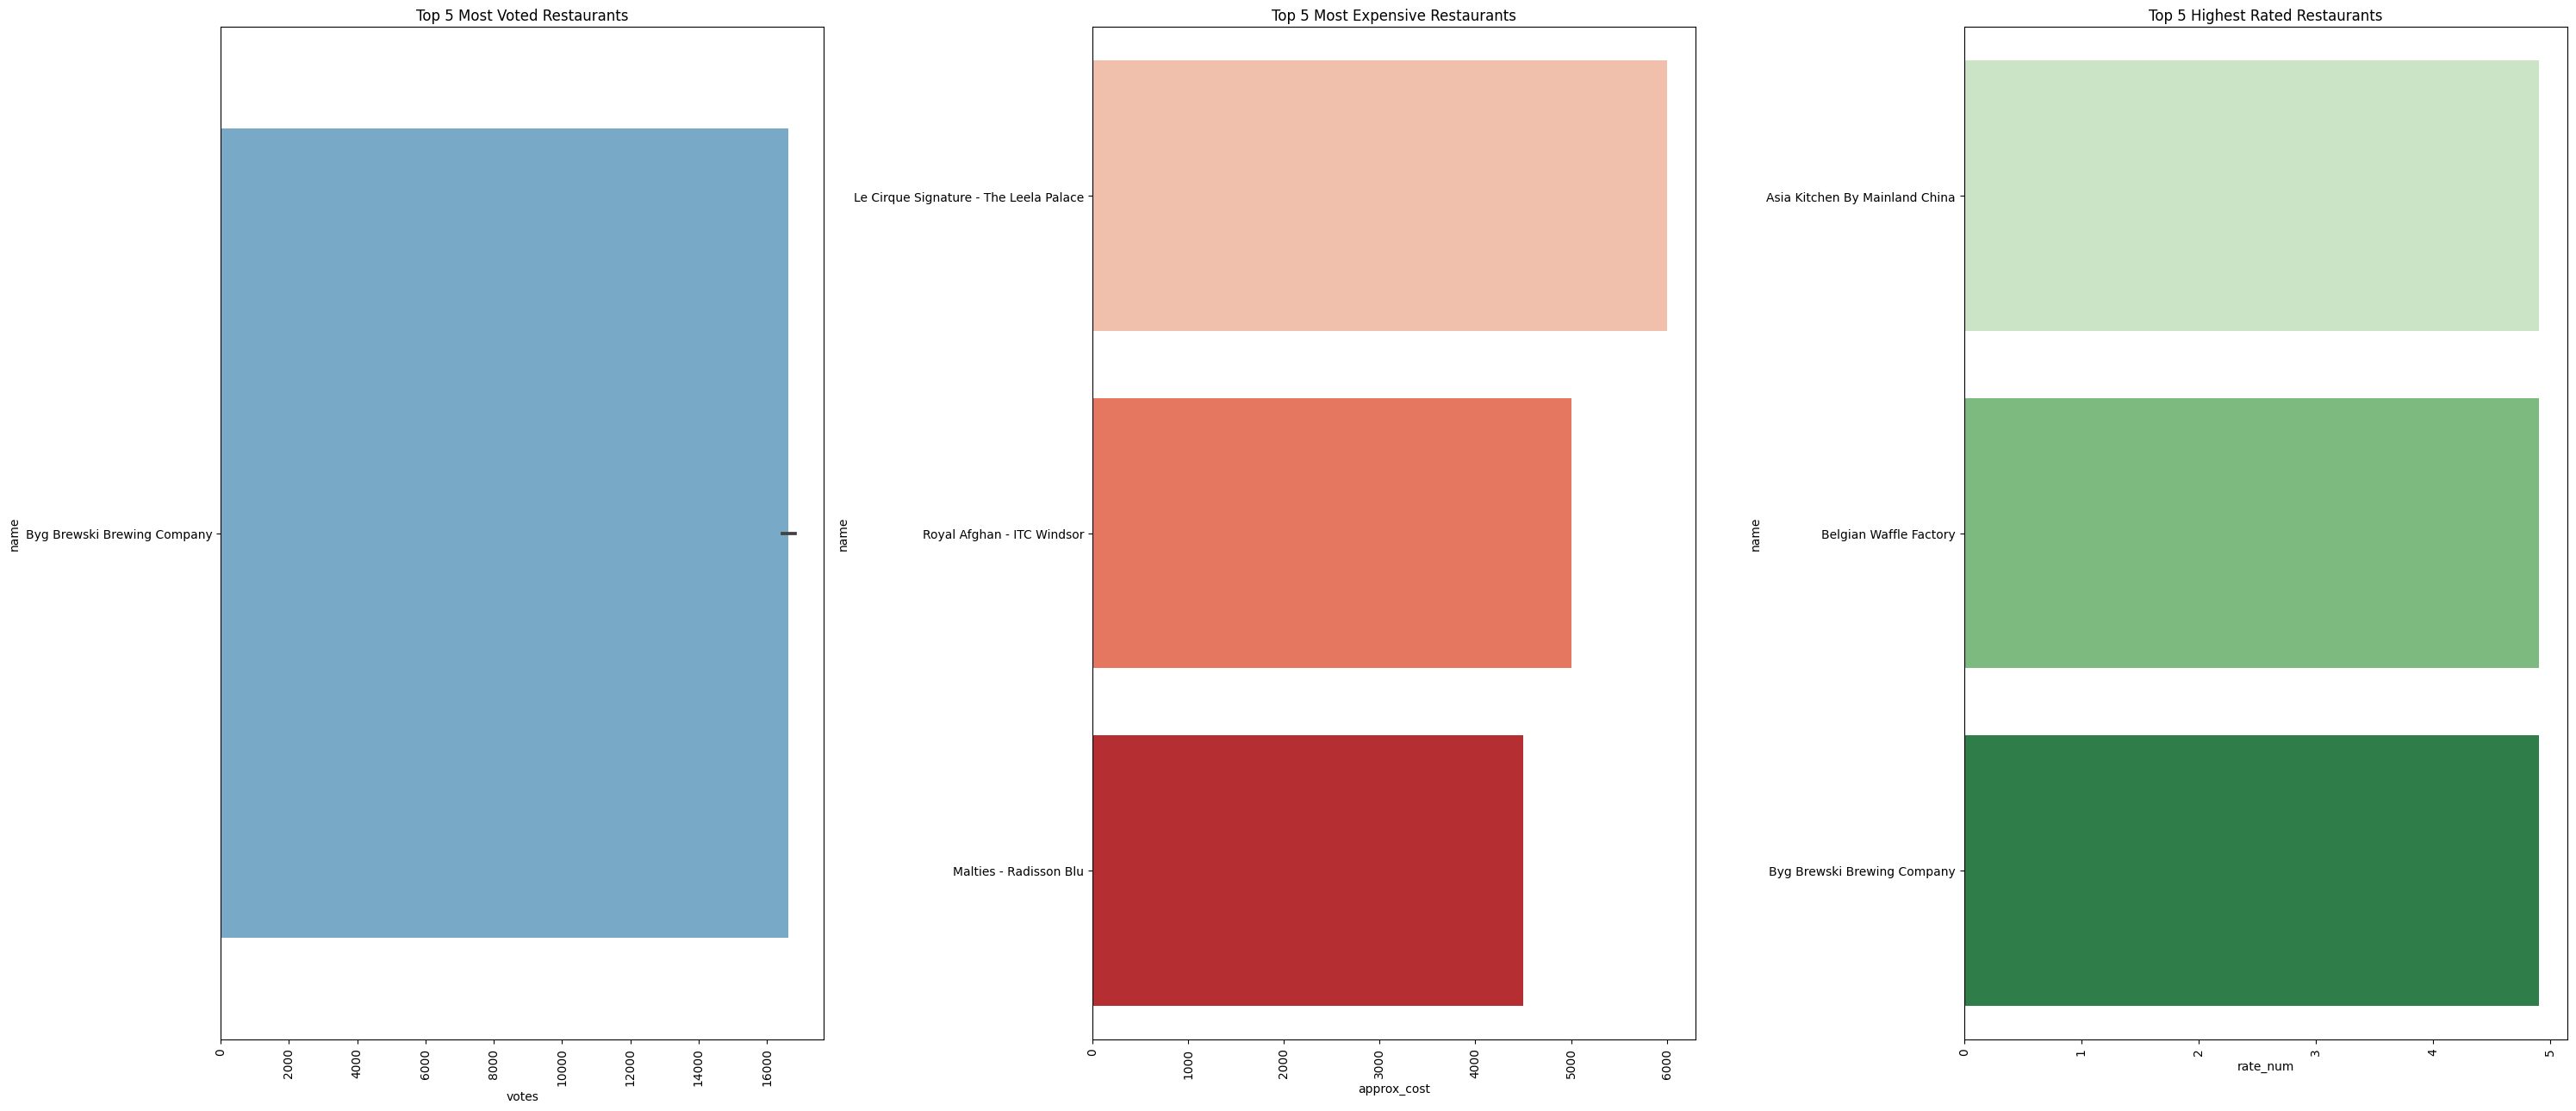

In [35]:
# Get the top 5 most voted restaurants
top_5_voted = df.sort_values(by='votes', ascending=False).head(5)
# Get the top 5 most expensive restaurants
top_5_expensive = df.sort_values(by='approx_cost', ascending=False).head(5)
# Get the top 5 highest rated restaurants
top_5_rated = df.sort_values(by='rate_num', ascending=False).head(5)

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 13))

# Plot the top 5 most voted restaurants on the first subplot
sns.barplot(y='name', x='votes', data=top_5_voted, palette='Blues', ax=ax1)
ax1.set_title('Top 5 Most Voted Restaurants')

# Plot the top 5 most expensive restaurants on the second subplot
sns.barplot(y='name', x='approx_cost', data=top_5_expensive, palette='Reds', ax=ax2)
ax2.set_title('Top 5 Most Expensive Restaurants')

# Plot the top 5 highest rated restaurants on the third subplot
sns.barplot(y='name', x='rate_num', data=top_5_rated, palette='Greens', ax=ax3)
ax3.set_title('Top 5 Highest Rated Restaurants')

# Rotate the x-axis labels on all subplots by 90 degrees
for ax in (ax1, ax2, ax3):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust the spacing between subplots and show the figure
plt.tight_layout()
plt.show()

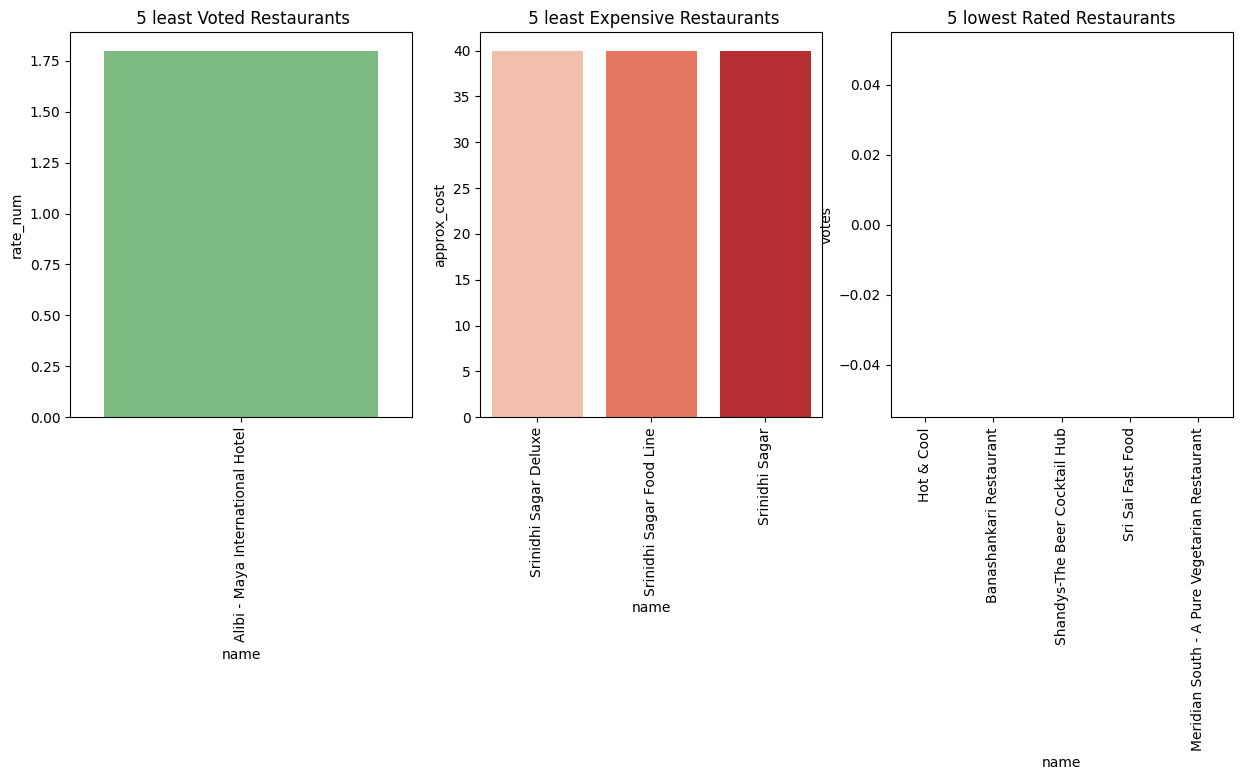

In [36]:
# Get the top 5 least voted restaurants
less_5_voted = df.sort_values(by='votes', ascending=True).head(5)
# Get the top 5 least expensive restaurants
less_5_expensive = df.sort_values(by='approx_cost', ascending=True).head(5)
# Get the top 5 lowest rated restaurants
less_5_rated = df.sort_values(by='rate_num', ascending=True).head(5)

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

# Plot the top 5 most voted restaurants on the first subplot
sns.barplot(x='name', y='votes', data=less_5_voted, palette='Blues', ax=ax3)
ax1.set_title(' 5 least Voted Restaurants')

# Plot the top 5 most expensive restaurants on the second subplot
sns.barplot(x='name', y='approx_cost', data=less_5_expensive, palette='Reds', ax=ax2)
ax2.set_title(' 5 least Expensive Restaurants')

# Plot the top 5 highest rated restaurants on the third subplot
sns.barplot(x='name', y='rate_num', data=less_5_rated, palette='Greens', ax=ax1)
ax3.set_title('5 lowest Rated Restaurants')

# Rotate the x-axis labels on all subplots by 90 degrees
for ax in (ax1, ax2, ax3):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust the spacing between subplots and show the figure
#plt.tight_layout()
plt.show()

In [37]:
# Plot the top 5 highest rated restaurants on the third subplot
less_5_rated = df.sort_values(by='rate_num', ascending=True).head(5)
less_5_rated


,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),approx_cost,rate_num
43489,https://www.zomato.com/bangalore/alibi-maya-in...,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,225,080 25594366\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese","[('Rated 1.0', 'RATED\n DO NOT GO HERE! Cheap...",[],Dine-out,MG Road,1200.0,1.8
48390,https://www.zomato.com/bangalore/alibi-maya-in...,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,225,080 25594366\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese","[('Rated 1.0', 'RATED\n DO NOT GO HERE! Cheap...",[],Dine-out,Residency Road,1200.0,1.8
12540,https://www.zomato.com/bangalore/alibi-maya-in...,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,224,080 25594366\r\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese","[('Rated 1.0', 'RATED\n DO NOT GO HERE! Cheap...",[],Dine-out,Church Street,1200.0,1.8
6300,https://www.zomato.com/bangalore/alibi-maya-in...,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,224,080 25594366\r\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese","[('Rated 1.0', 'RATED\n DO NOT GO HERE! Cheap...",[],Dine-out,Brigade Road,1200.0,1.8
38870,https://www.zomato.com/bangalore/alibi-maya-in...,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,225,080 25594366\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese","[('Rated 1.0', 'RATED\n DO NOT GO HERE! Cheap...",[],Dine-out,Lavelle Road,1200.0,1.8


In [ ]:
# number of resaurants in every area according to  30 location

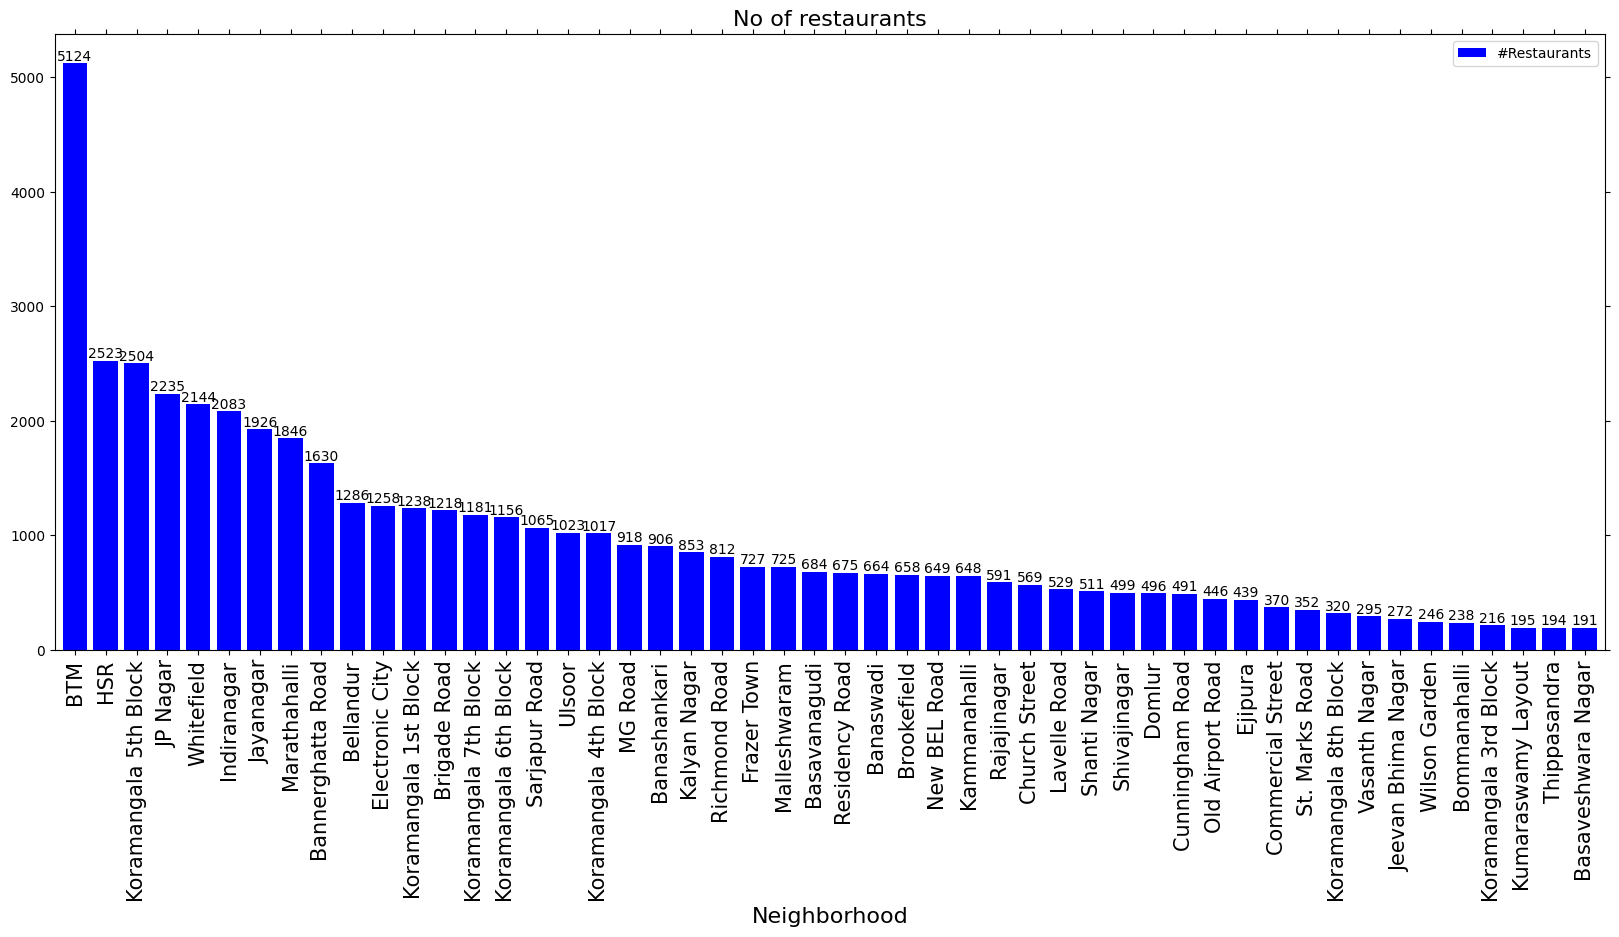

In [38]:
histo = df.groupby('location')['url'].count().sort_values(ascending=False)[:50]
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood', fontsize=16)

#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

In [47]:
# effect of presence of book table on rate and cost

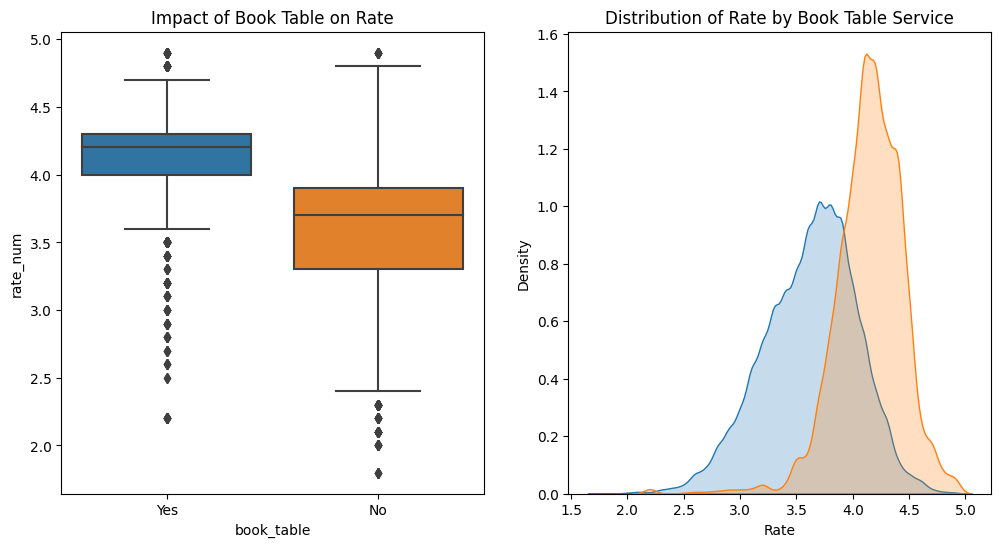

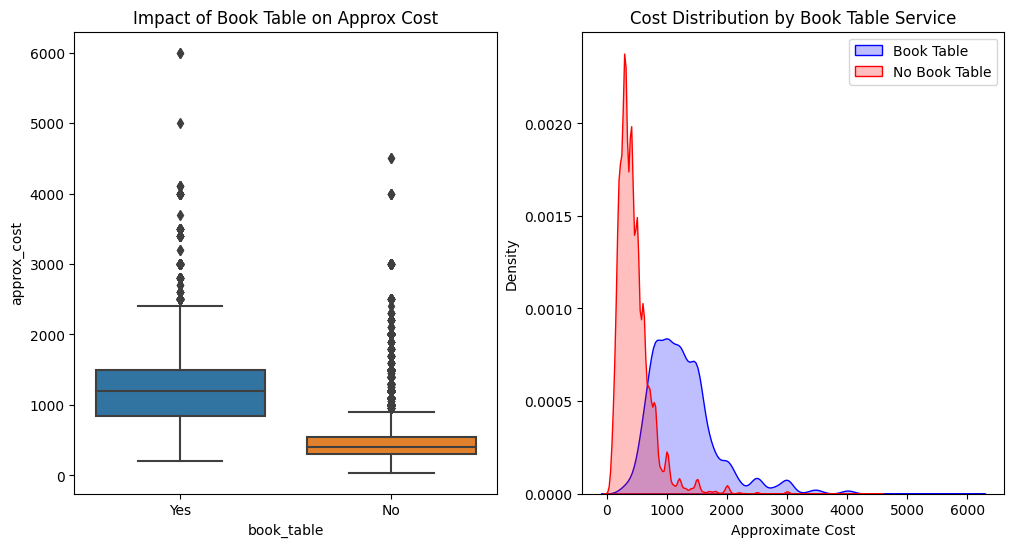

In [83]:
# Create separate dataframes for restaurants with and without book table service
with_book_table = df[df['book_table'] == 'Yes']
without_book_table = df[df['book_table'] == 'No']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first boxplot for Rate in the first subplot
sns.boxplot(x='book_table', y='rate_num', data=df, ax=ax1)
ax1.set_title('Impact of Book Table on Rate')

# Plot the distribution of Rate by Book Table Service using kdeplot in the second subplot
sns.kdeplot(without_book_table['rate_num'], shade=True, label='No Book Table Service', ax=ax2)
sns.kdeplot(with_book_table['rate_num'], shade=True, label='Book Table Service', ax=ax2)
ax2.set_xlabel('Rate')
ax2.set_ylabel('Density')
ax2.set_title('Distribution of Rate by Book Table Service')

# Create a figure with two subplots
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the second boxplot for Approx Cost in the third subplot
sns.boxplot(x='book_table', y='approx_cost', data=df, ax=ax3)
ax3.set_title('Impact of Book Table on Approx Cost')

# Plot the distribution of Approx Cost by Book Table Service using kdeplot in the fourth subplot
sns.kdeplot(with_book_table['approx_cost'], label='Book Table', shade=True, color='b', ax=ax4)
sns.kdeplot(without_book_table['approx_cost'], label='No Book Table', shade=True, color='r', ax=ax4)
ax4.set_xlabel('Approximate Cost')
ax4.set_ylabel('Density')
ax4.set_title('Cost Distribution by Book Table Service')
ax4.legend()

plt.show()


In [48]:
# effect of online order on rate and cost

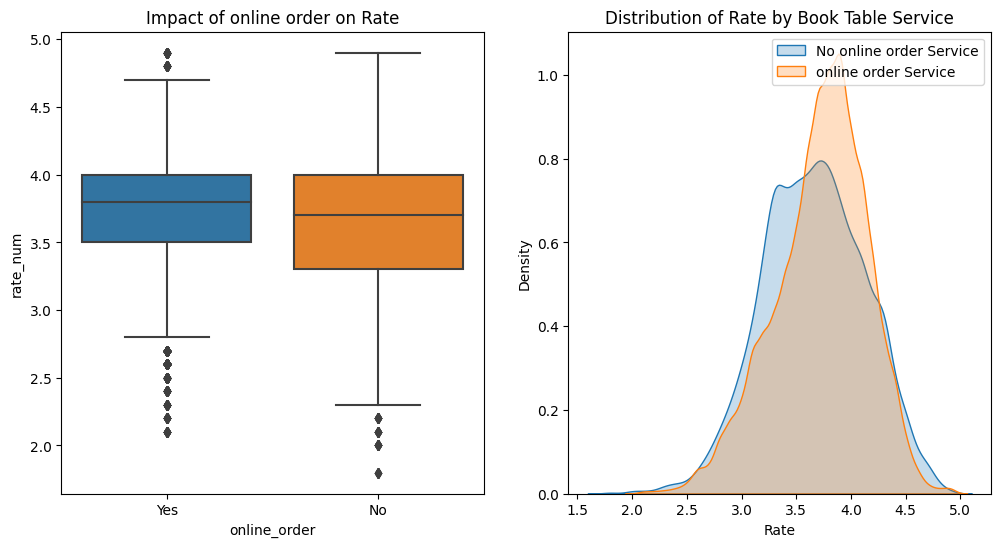

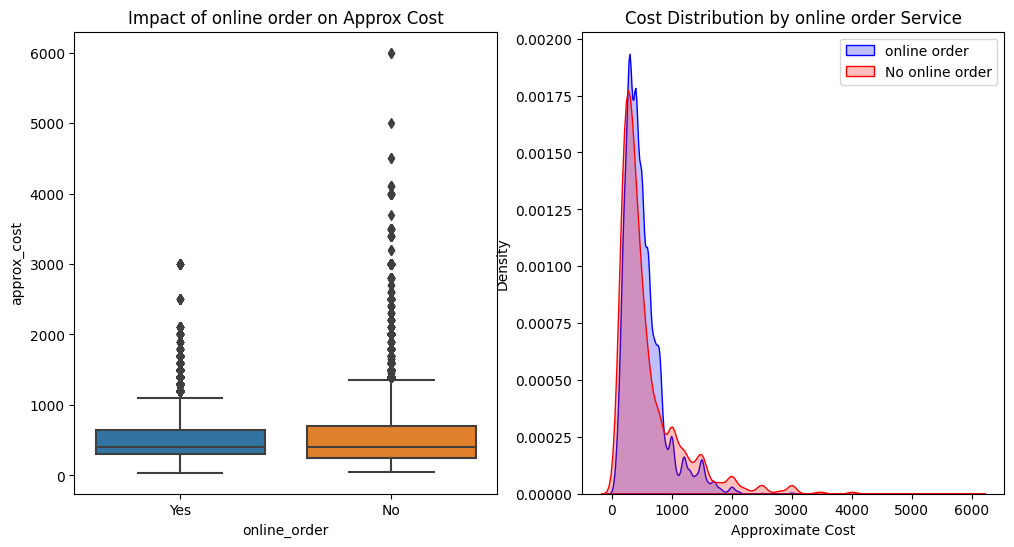

In [84]:
# Create separate dataframes for restaurants with and without book table service
with_online_order = df[df['online_order'] == 'Yes']
without_online_order = df[df['online_order'] == 'No']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first boxplot for Rate in the first subplot
sns.boxplot(x='online_order', y='rate_num', data=df, ax=ax1)
ax1.set_title('Impact of online order on Rate')

# Plot the distribution of Rate by Book Table Service using kdeplot in the second subplot
sns.kdeplot(without_online_order['rate_num'], shade=True, label='No online order Service', ax=ax2)
sns.kdeplot(with_online_order['rate_num'], shade=True, label='online order Service', ax=ax2)
ax2.set_xlabel('Rate')
ax2.set_ylabel('Density')
ax2.set_title('Distribution of Rate by Book Table Service')
ax2.legend()

# Create a figure with two subplots
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the second boxplot for Approx Cost in the third subplot
sns.boxplot(x='online_order', y='approx_cost', data=df, ax=ax3)
ax3.set_title('Impact of online order on Approx Cost')

# Plot the distribution of Approx Cost by Book Table Service using kdeplot in the fourth subplot
sns.kdeplot(with_online_order['approx_cost'], label='online order', shade=True, color='b', ax=ax4)
sns.kdeplot(without_online_order['approx_cost'], label='No online order', shade=True, color='r', ax=ax4)
ax4.set_xlabel('Approximate Cost')
ax4.set_ylabel('Density')
ax4.set_title('Cost Distribution by online order Service')
ax4.legend()

plt.show()


In [55]:
#explore relationship between mean rate,mean cost and city name

          listed_in(city)  rate_num  approx_cost
7           Church Street  3.804262   771.990104
21                MG Road  3.802023   763.987696
5            Brigade Road  3.801146   767.091115
27         Residency Road  3.781222   742.960723
20           Lavelle Road  3.776818   753.584873
18  Koramangala 6th Block  3.763153   521.340524
17  Koramangala 5th Block  3.760255   522.979026
16  Koramangala 4th Block  3.759035   528.353924
19  Koramangala 7th Block  3.758410   520.497598
11            Indiranagar  3.745659   654.753655
25       Old Airport Road  3.719040   610.877698
22           Malleshwaram  3.715523   574.789762
9             Frazer Town  3.714838   558.237288
3            Basavanagudi  3.707276   445.137549
0                     BTM  3.707241   495.485145
13              Jayanagar  3.694969   469.077053
1            Banashankari  3.666758   401.551564
10                    HSR  3.660821   487.814302
26            Rajajinagar  3.656948   485.874649
14           Kalyan 

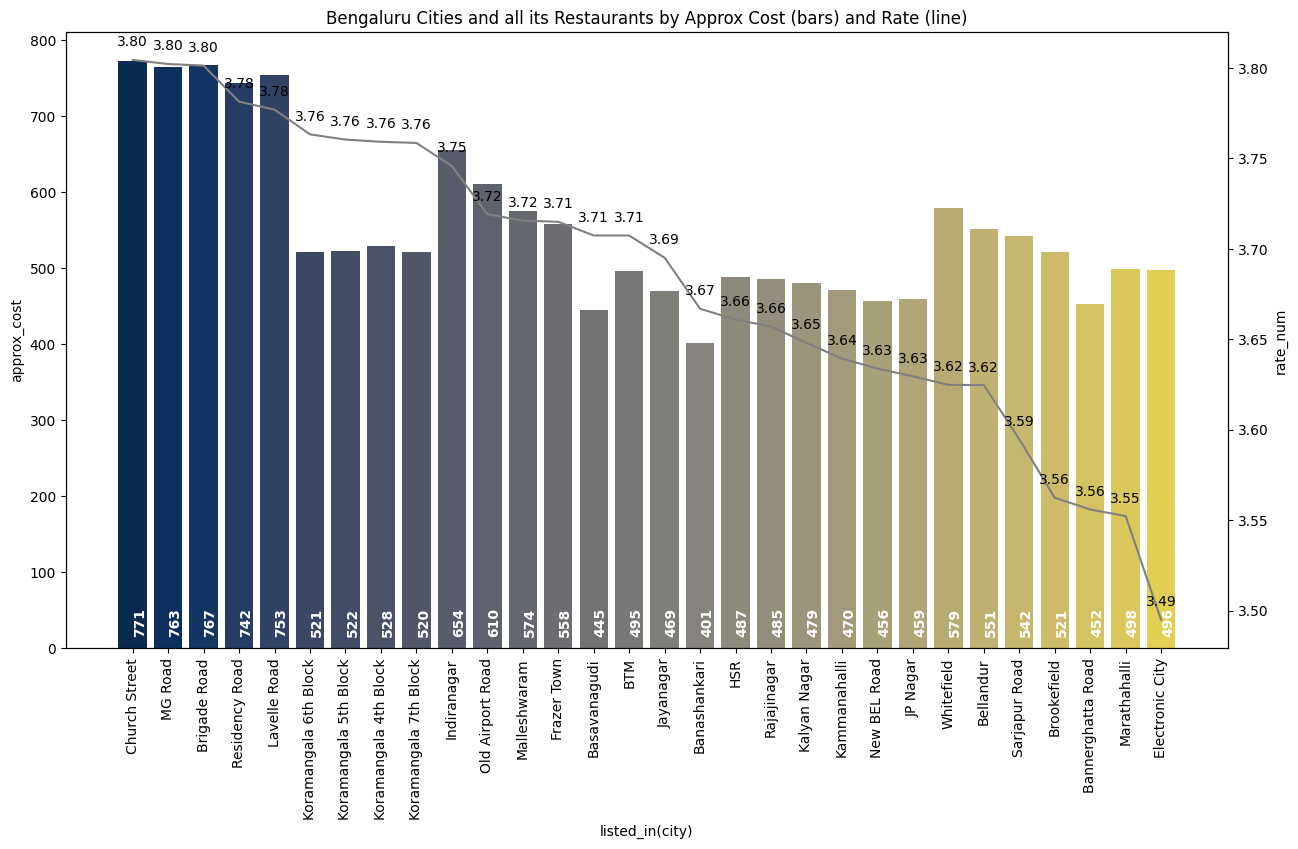

In [85]:
# Grouping data by city
city_group = df.groupby(by='listed_in(city)', as_index=False).agg({'rate_num': 'mean',
                                                                               'approx_cost': 'mean'})
city_group.sort_values(by='rate_num', ascending=False, inplace=True)

print(city_group)

# Ploting
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='listed_in(city)', y='approx_cost', data=city_group, palette='cividis', 
            order=city_group['listed_in(city)'])
ax2 = ax.twinx()
sns.lineplot(x='listed_in(city)', y='rate_num', data=city_group, color='gray', ax=ax2, sort=False)

# Labeling line chart (rate)
xs = np.arange(0, len(city_group), 1)
ys = city_group['rate_num']
for x,y in zip(xs, ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')
    
# Labeling bar chart (cost)
for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{}'.format(int(y)), (x.mean(), 15), va='bottom', rotation='vertical', color='white', 
                fontweight='bold')

# Customizing chart
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Bengaluru Cities and all its Restaurants by Approx Cost (bars) and Rate (line)')
plt.show()

In [ ]:
# explore restaurants in every city with total votes, mean rate, and mean cost and then visualize them on map

In [86]:
# Extracting lat and long from the restaurant city using an API service
geolocator = Nominatim(user_agent="Y_BzShFZceZ_rj_t-cI13w")

# Creating a auxiliar dataset with cities location (reducing the API calls and time consuming by consequence)
cities_aux = pd.DataFrame(df['listed_in(city)'].value_counts())
cities_aux.reset_index(inplace=True)
cities_aux.columns = ['city', 'total_restaurants']

# Extracting cities lat and long features
cities_aux['lat'] = cities_aux['city'].apply(lambda x: geolocator.geocode(x)[1][0])
cities_aux['lng'] = cities_aux['city'].apply(lambda x: geolocator.geocode(x)[1][1])

# Adding more features do further analysis
city_group = df.groupby(by='listed_in(city)', as_index=False).agg({'votes': 'sum',
                                                                               'approx_cost': 'mean',
                                                                               'rate_num': 'mean'})
city_group.columns = ['city', 'total_votes', 'avg_approx_cost', 'avg_rate_num']

# Creating an unique city data
cities_aux = cities_aux.merge(city_group, how='left', on='city')

# Merging the original data to the grouped cities lat and long
df= df.merge(cities_aux, how='left', left_on='listed_in(city)', right_on='city')
df.drop(['city', 'total_restaurants'], axis=1, inplace=True)

# Results on cities grouped data
cities_aux

,city,total_restaurants,lat,lng,total_votes,avg_approx_cost,avg_rate_num
0,BTM,3279,45.954851,-112.496595,985690,495.485145,3.707241
1,Koramangala 7th Block,2938,12.936485,77.613478,1065901,520.497598,3.758410
2,Koramangala 5th Block,2836,12.934843,77.618977,1040312,522.979026,3.760255
3,Koramangala 4th Block,2779,12.932778,77.629405,992065,528.353924,3.759035
4,Koramangala 6th Block,2623,12.939025,77.623848,978900,521.340524,3.763153
5,Jayanagar,2371,27.643927,83.052805,563880,469.077053,3.694969
6,JP Nagar,2096,12.265594,76.646540,395852,459.774904,3.629472
7,Indiranagar,1860,12.973291,77.640467,781831,654.753655,3.745659
8,Church Street,1827,40.709746,-74.011604,687895,771.990104,3.804262
9,MG Road,1811,12.975526,77.606790,722679,763.987696,3.802023


In [13]:
#fill misssing data with simple imputer or KNN

In [91]:
# Zipping locations for folium map
locations = list(zip(df['lat'].values, df['lng'].values))

# Creating a map using folium
map1 = folium.Map(
    location=[12.97, 77.63],
    zoom_start=11.5
)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

Heat Map: where are the restaurants with high average rate?

In [98]:
map1 = folium.Map(
    location=[12.97, 77.63],
    zoom_start=11.0,
    tiles='cartodbdark_matter'
)

HeatMap(
    data=cities_aux.loc[:, ['lat', 'lng', 'avg_rate_num']],
    radius=35
).add_to(map1)

map1

explore if there is some preference in zomato orders.
How the rate and approx cost are distributed among restaurant types?

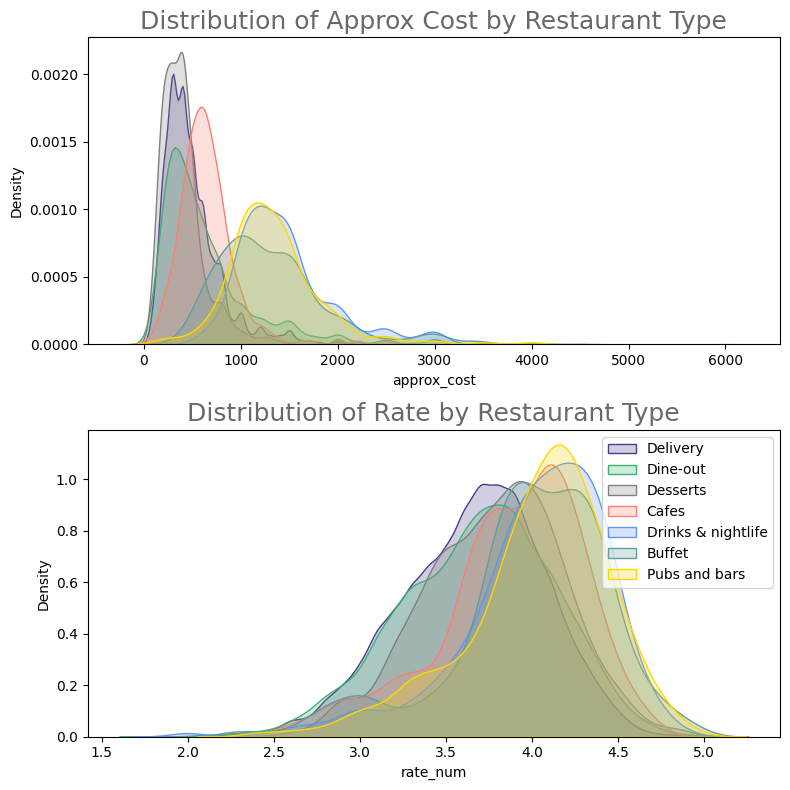

In [87]:
rest_types = list(df['listed_in(type)'].value_counts().index)
colors = ['darkslateblue', 'mediumseagreen', 'gray', 'salmon', 'cornflowerblue', 'cadetblue', 'gold']

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
for r_type in rest_types:
    idx = rest_types.index(r_type)
    kde_data = df[(df['rate_num'] > 0) & (df['listed_in(type)'] == r_type)]
    sns.kdeplot(kde_data['rate_num'], ax=axs[1], color=colors[idx], shade=True, label=r_type)
    sns.kdeplot(kde_data['approx_cost'], ax=axs[0], color=colors[idx], shade=True, label=r_type)

# Customizing charts
axs[1].set_title('Distribution of Rate by Restaurant Type', color='dimgrey', size=18)
plt.legend()

axs[0].set_title('Distribution of Approx Cost by Restaurant Type', color='dimgrey', size=18)
plt.legend()
#for ax in axs:
#format_spines(ax, right_border=False)
plt.tight_layout()

In [28]:
df["cuisines"].head(10)

0                 North Indian, Mughlai, Chinese
1                    Chinese, North Indian, Thai
2                         Cafe, Mexican, Italian
3                     South Indian, North Indian
4                       North Indian, Rajasthani
5                                   North Indian
6    North Indian, South Indian, Andhra, Chinese
7                           Pizza, Cafe, Italian
8                     Cafe, Italian, Continental
9       Cafe, Mexican, Italian, Momos, Beverages
Name: cuisines, dtype: object

explore the customer's food preferences, go trough the text presented in the columns like cuisines and dish_liked to extract valuable information about options available in restaurants.

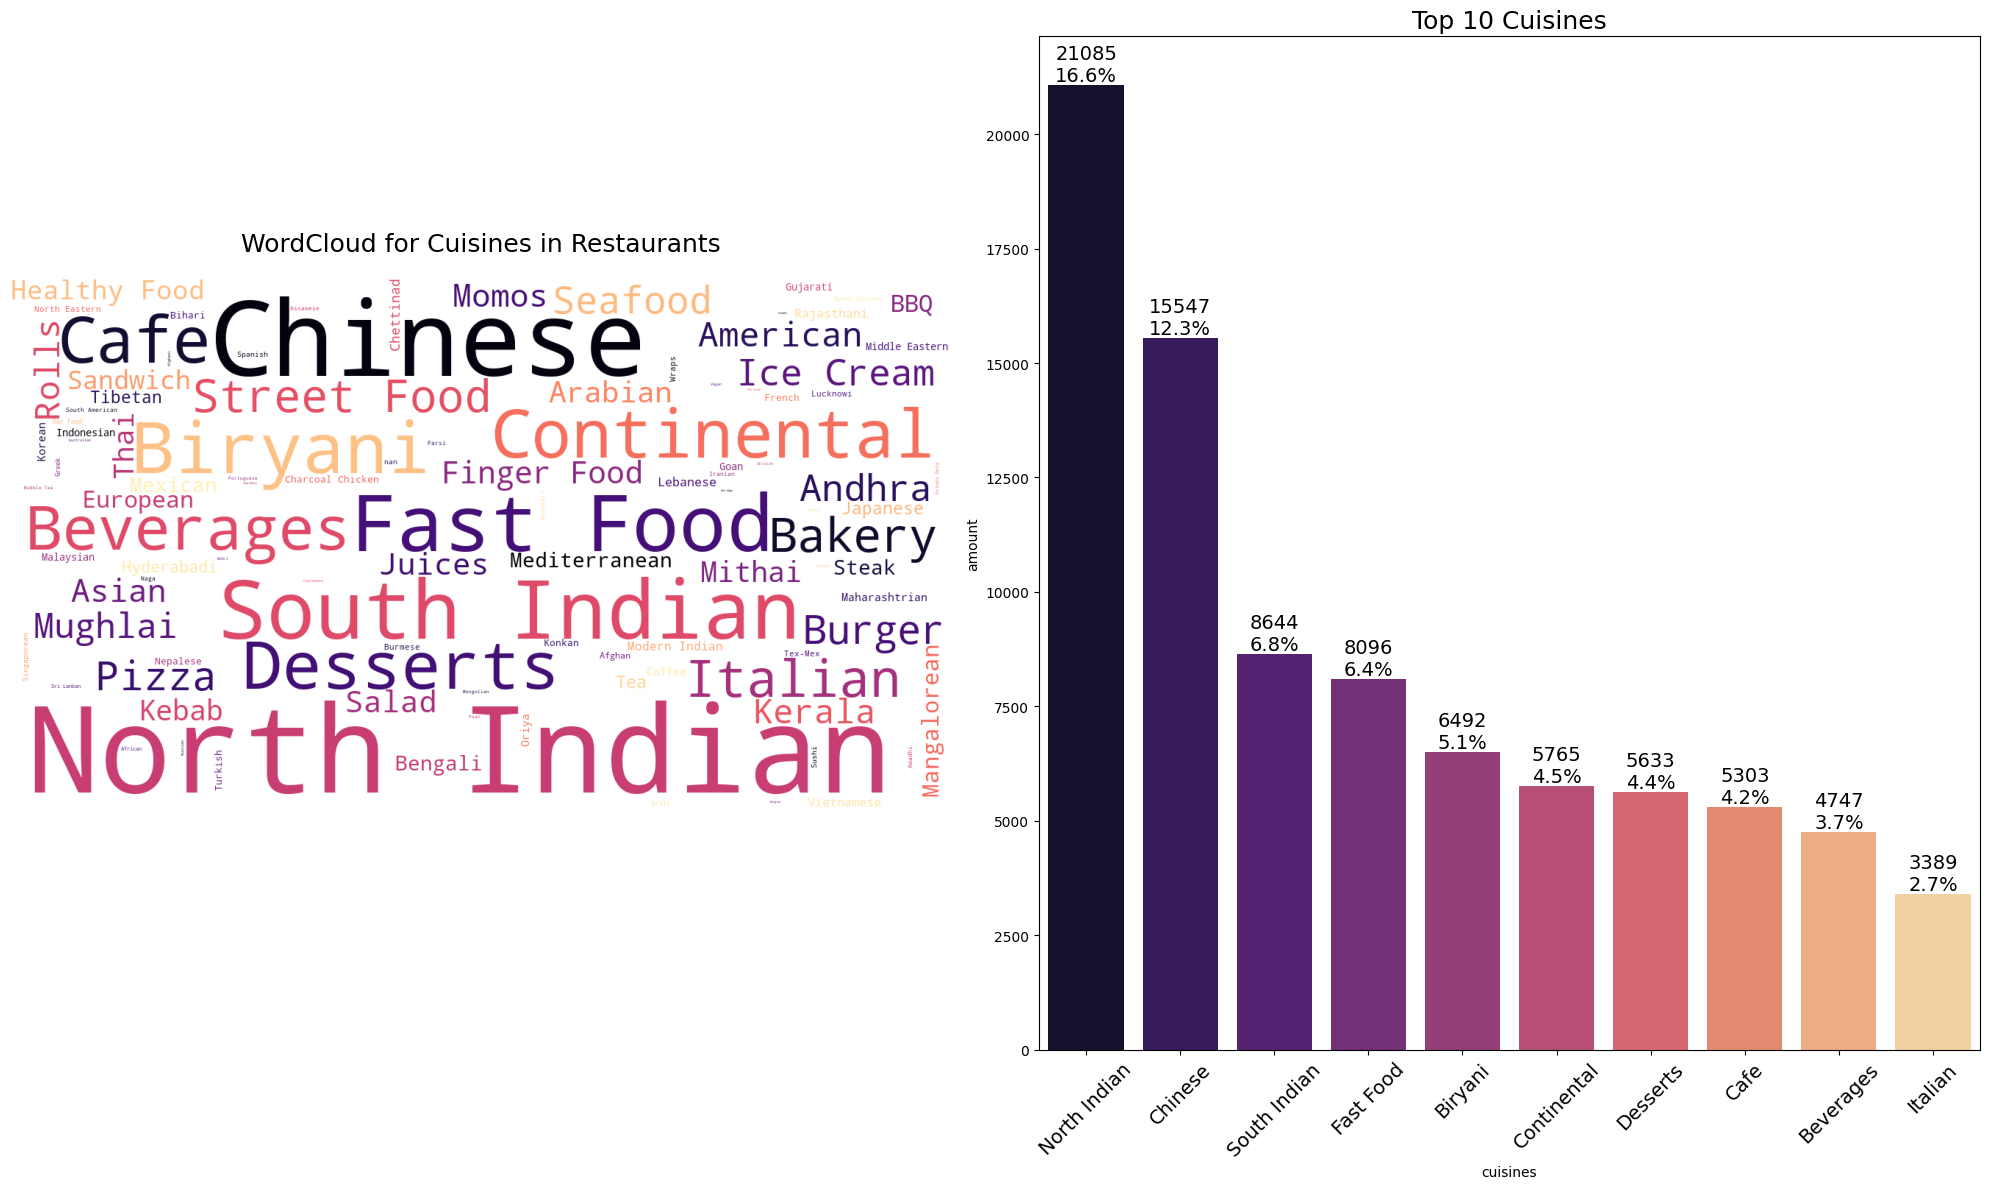

In [88]:
# Creating a list with all options available
cuisines = list(df['cuisines'].astype(str).values)
cuisines_word_list = []
for lista in [c.split(',') for c in cuisines]:
    for word in lista:
        cuisines_word_list.append(word.strip())
        
# Creating a Counter for unique options and generating the wordcloud
cuisines_wc_dict = Counter(cuisines_word_list)

wordcloud = WordCloud(width=1280, height=720, collocations=False, random_state=42, 
                      colormap='magma', background_color='white').generate_from_frequencies(cuisines_wc_dict)

# Visualizing the WC created and the total for each cuisine
fig, axs = plt.subplots(1, 2, figsize=(20, 12))
ax1 = axs[0]
ax2 = axs[1]
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('WordCloud for Cuisines in Restaurants', size=18, pad=20)

# Total for each cuisine
df_cuisines = pd.DataFrame()
df_cuisines['cuisines'] = cuisines_wc_dict.keys()
df_cuisines['amount'] = cuisines_wc_dict.values()
df_cuisines.sort_values(by='amount', ascending=False, inplace=True)
sns.barplot(x='cuisines', y='amount', data=df_cuisines.head(10), palette='magma', ax=ax2)

ax2.set_title('Top 10 Cuisines', size=18)

# Customizing chart
ncount = df_cuisines['amount'].sum()
x_ticks = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels(x_ticks, rotation=45, fontsize=14)
for p in ax2.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax2.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), fontsize=14, ha='center', va='bottom')

plt.tight_layout()
plt.show()

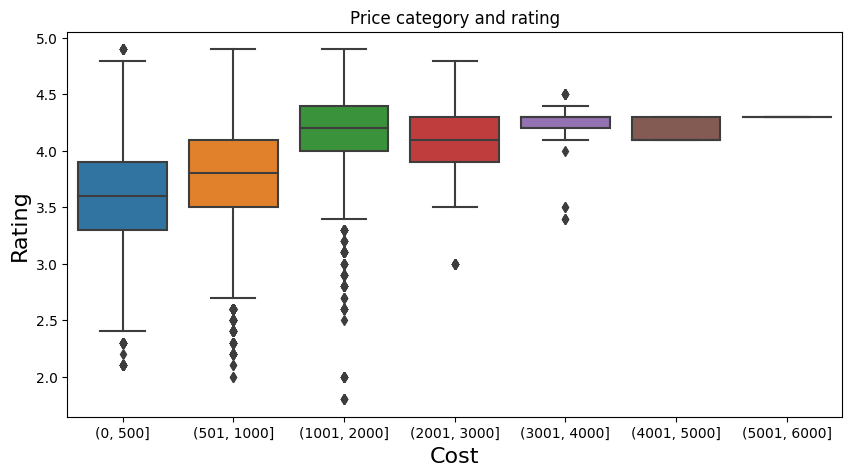

In [24]:
# Now lets plot box plot based on the cost of food
bins = pd.IntervalIndex.from_tuples([(0, 500), (501, 1000), (1001, 2000), (2001, 3000), (3001, 4000), (4001, 5000), (5001, 6000)])
df['cost'] = pd.cut(df['approx_cost'], bins)

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="cost", y="rate_num", data=df)
ax.set_xlabel('Cost', fontsize=16)
ax.set_ylabel('Rating', fontsize=16)
ax.set_title('Price category and rating')
plt.savefig("box.png")
#df.drop('cost', axis=1, inplace=True)

We can see a lot of North Indian, Chinese, South Indian, Fast Food, Desserts and other patterns related to options available. Good! Let's apply the same approach on dish_liked column to see if there are more trends.

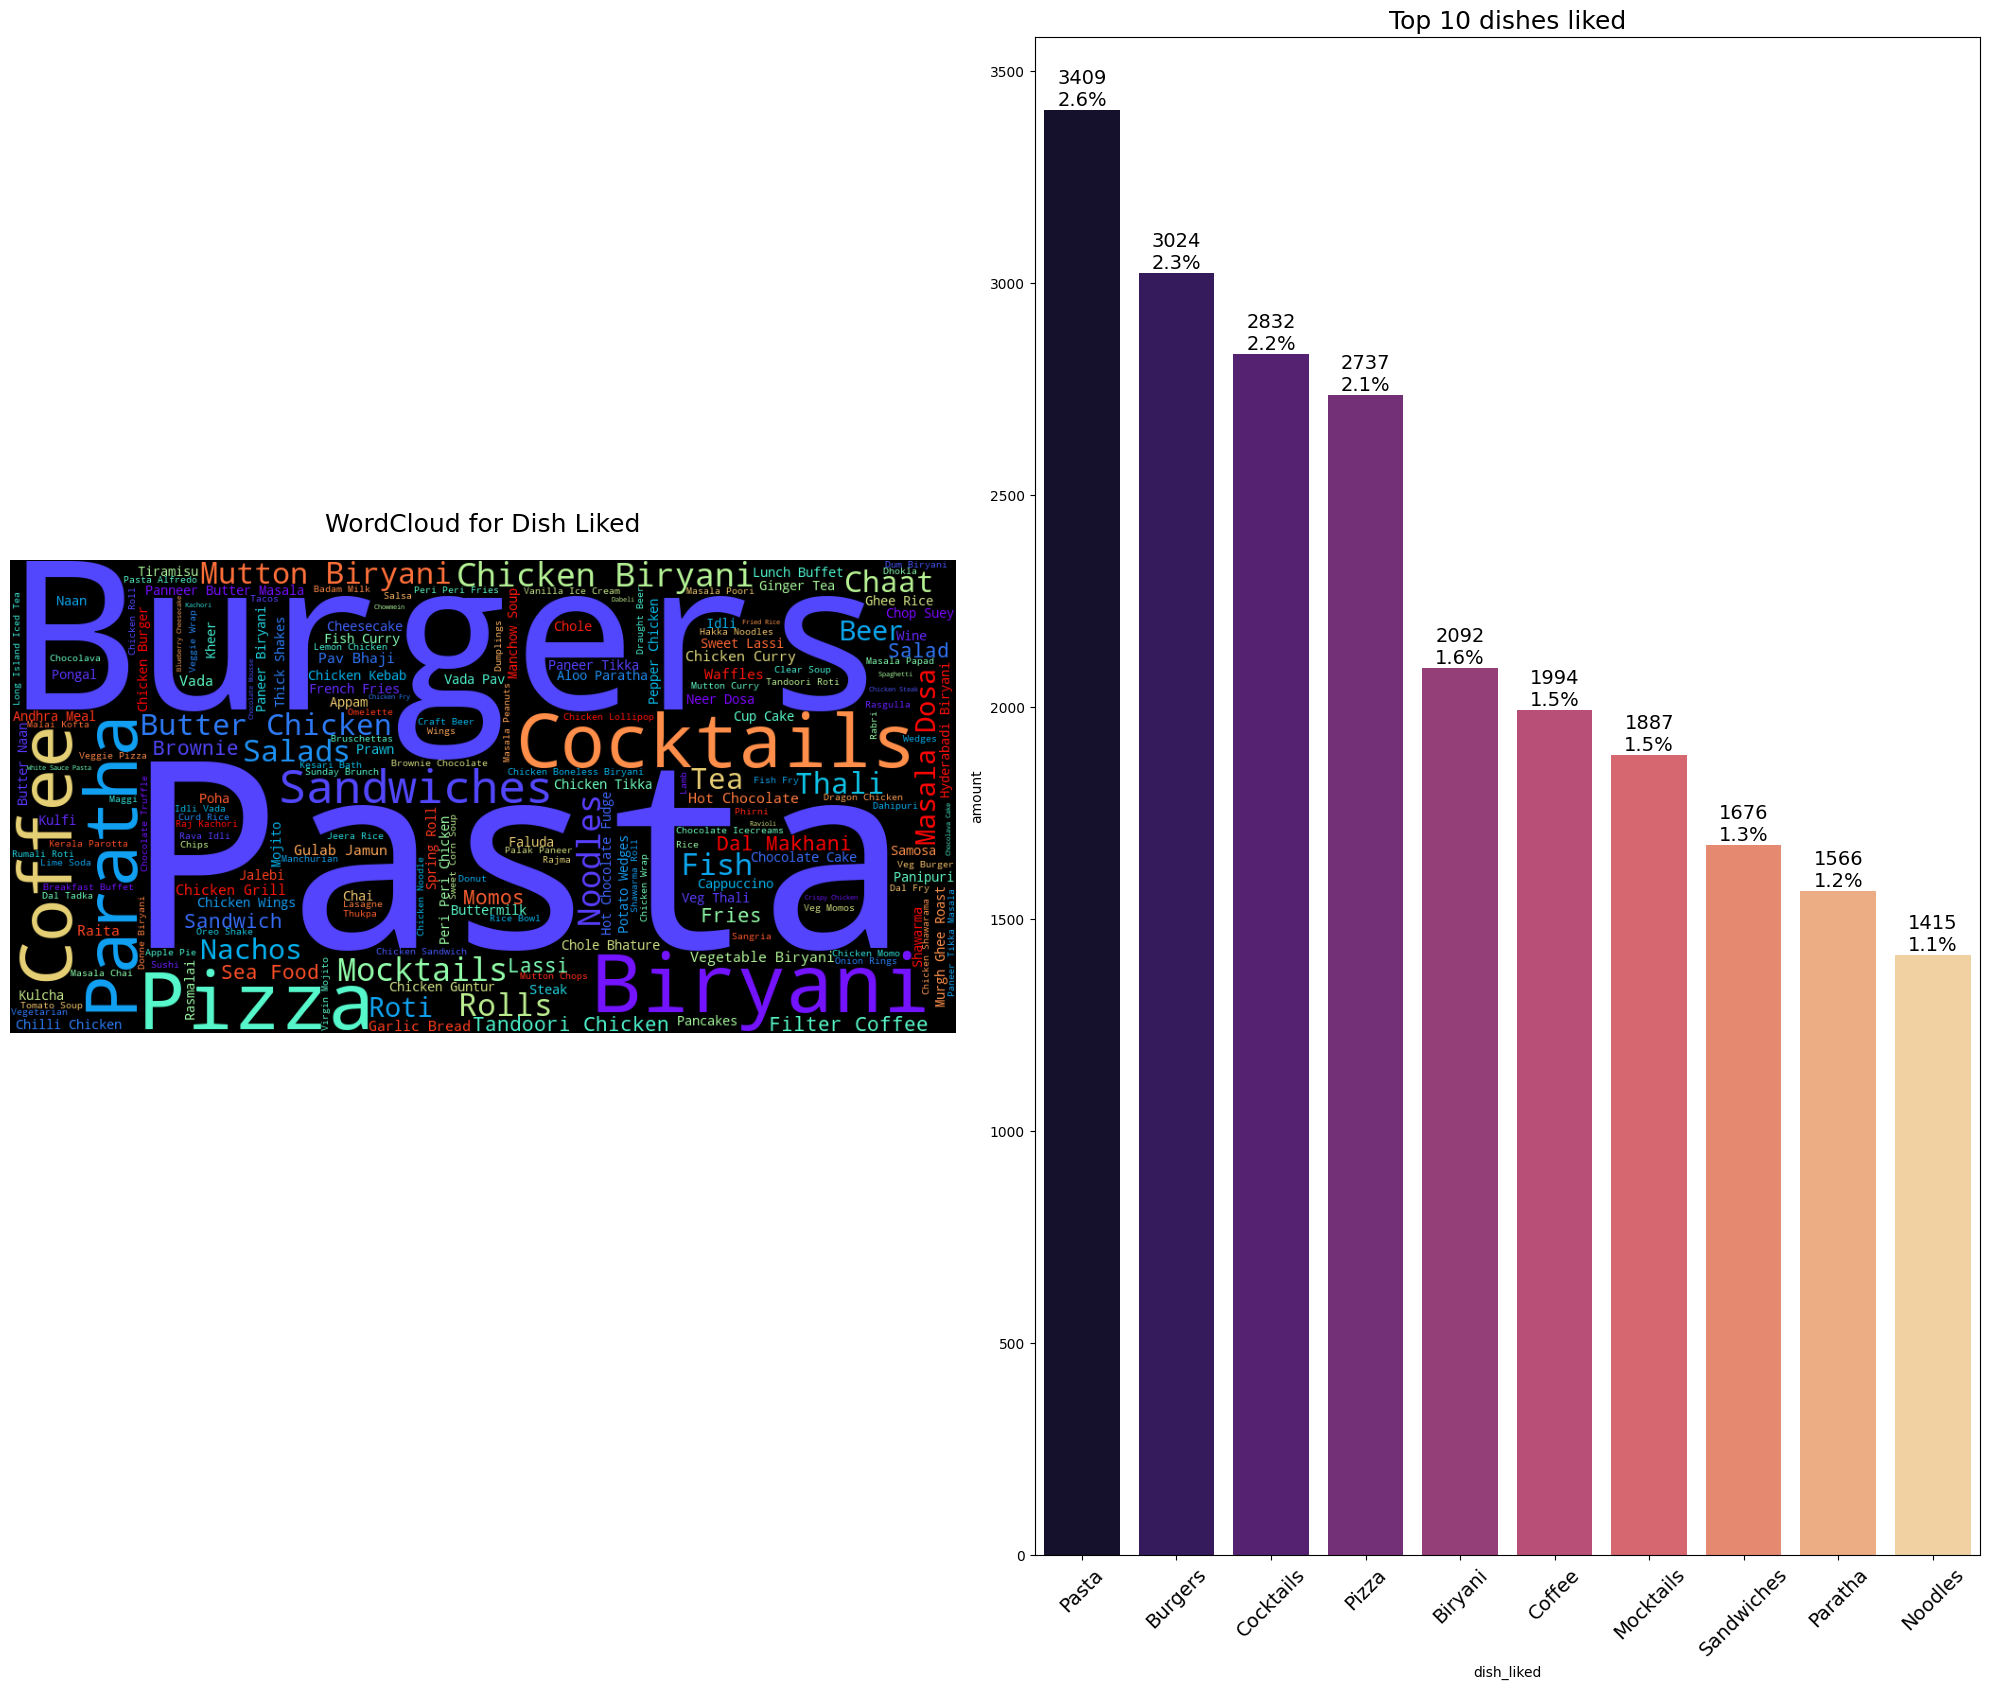

In [89]:
# Creating a list with all options available
dishes = list(df['dish_liked'].dropna().astype(str).values)
dishes_word_list = []
for lista in [c.split(',') for c in dishes]:
    for word in lista:
        dishes_word_list.append(word.strip())
    
        
# Creating a Counter for unique options and generating the wordcloud
dishes_wc_dict = Counter(dishes_word_list)


# Generating the wordcloud    
wordcloud = WordCloud(width=1000, height=500, collocations=False, random_state=42, colormap='rainbow', 
                      background_color='black').generate_from_frequencies(dished_wc_dict)


# Visualizing the WC created
fig, axs = plt.subplots(1,2, figsize=(20, 17))
ax1 =axs[0]
ax2= axs[1]
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('WordCloud for Dish Liked', size=18, pad=20)

# Total for each cuisine
df_dishes = pd.DataFrame()
df_dishes['dish_liked'] = dishes_wc_dict.keys()
df_dishes['amount'] = dishes_wc_dict.values()
df_dishes.sort_values(by='amount', ascending=False, inplace=True)
sns.barplot(x='dish_liked', y='amount', data=df_dishes.head(10), palette='magma', ax=ax2)

ax2.set_title('Top 10 dishes liked', size=18)

# Customizing chart
ncount = df_dishes['amount'].sum()
x_ticks = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels(x_ticks, rotation=45, fontsize=14)
for p in ax2.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax2.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), fontsize=14, ha='center', va='bottom')

plt.tight_layout()
plt.show()

we arrived at our main task on this notebook: predict the success of a restaurant using the data provided and extracting some additional features:

1. Use the restaurant rate to classify our data in two classes: good and bad (threshold= 3.7)
2. Create a target variable using a pre-defined rate threshold
3. Extract features from the data
4. Create a classification model using a supervisioned approach
5. Predict the "probability for being a good restaurant" for the ones marked as NEW or without rate

First of all, let's split the data we will use for train/validation and the data we want to do a real prediction.

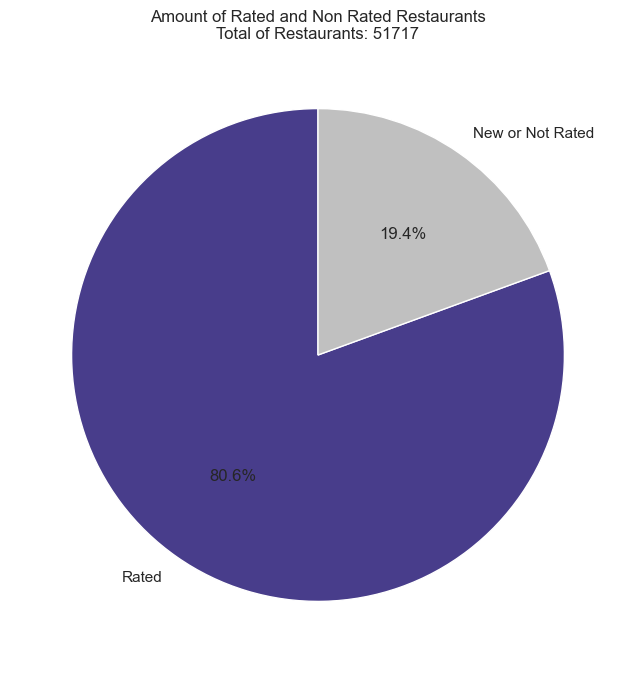

In [49]:
# Splitting restaurants
df['rated'] = df['rate_num'].apply(lambda x: 1 if x >= 0 else 0)
new_restaurants = df.query('rated == 0')
df1= df.query('rated == 1')

# Plotting a pie chart to see the distribution
fig, ax = plt.subplots(figsize=(8, 8))
data = [len(df1), len(new_restaurants)]
labels = ['Rated', 'New or Not Rated']
colors = ['darkslateblue', 'silver']
ax.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Amount of Rated and Non Rated Restaurants\nTotal of Restaurants: {}'.format(len(df)))
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              51717 non-null  object 
 1   address          51717 non-null  object 
 2   name             51717 non-null  object 
 3   online_order     51717 non-null  object 
 4   book_table       51717 non-null  object 
 5   votes            51717 non-null  int64  
 6   phone            50509 non-null  object 
 7   location         51696 non-null  object 
 8   rest_type        51490 non-null  object 
 9   dish_liked       23639 non-null  object 
 10  cuisines         51672 non-null  object 
 11  reviews_list     51717 non-null  object 
 12  menu_item        51717 non-null  object 
 13  listed_in(type)  51717 non-null  object 
 14  listed_in(city)  51717 non-null  object 
 15  approx_cost      51371 non-null  float64
 16  rate_num         41665 non-null  float64
 17  rated       

By now we've already splitted our original data into new_restaurants and df1 pandas DataFrames. Let's keep the first one aside for now and let's work only with the training and validation set. The next step is to create our target variable to be used in this classification task.

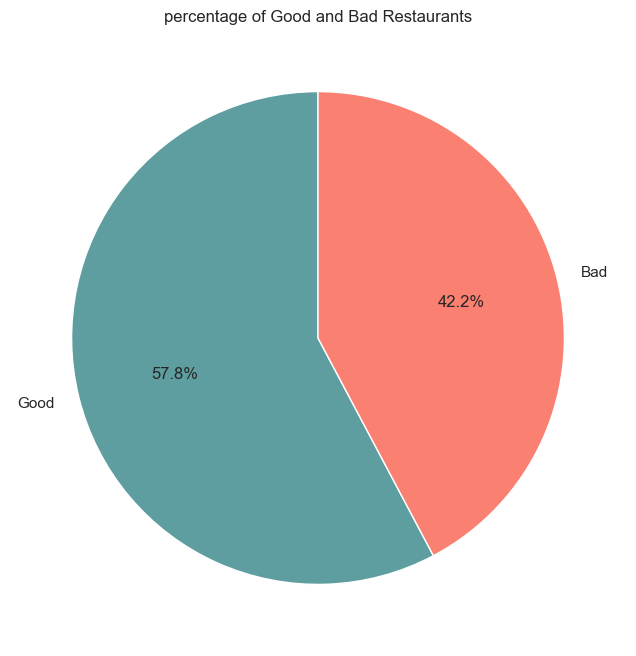

In [52]:
# Defining a custom threshold for splitting restaurants into good and bad
threshold = 3.7
df1['target'] = df1['rate_num'].apply(lambda x: 1 if x >= threshold else 0)

# Pie chart
fig, ax = plt.subplots(figsize=(8, 8))
label_names = ['Bad' if target == 0 else 'Good' for target in df1['target'].value_counts().index]
color_list = ['salmon' if label == 'Bad' else 'cadetblue' for label in label_names]
data = df1['target'].value_counts().values
ax.pie(data, labels=label_names, colors=color_list, autopct='%1.1f%%', startangle=90)
ax.set_title('percentage of Good and Bad Restaurants')
plt.show()

we marked as good restaurants with a rate greater or equal 3.7.
The next step is to prepare some features for training our classification model.

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41665 entries, 0 to 51716
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              41665 non-null  object 
 1   address          41665 non-null  object 
 2   name             41665 non-null  object 
 3   online_order     41665 non-null  object 
 4   book_table       41665 non-null  object 
 5   votes            41665 non-null  int64  
 6   phone            40851 non-null  object 
 7   location         41665 non-null  object 
 8   rest_type        41516 non-null  object 
 9   dish_liked       23462 non-null  object 
 10  cuisines         41654 non-null  object 
 11  reviews_list     41665 non-null  object 
 12  menu_item        41665 non-null  object 
 13  listed_in(type)  41665 non-null  object 
 14  listed_in(city)  41665 non-null  object 
 15  approx_cost      41418 non-null  float64
 16  rate_num         41665 non-null  float64
 17  rated       

## Feature extraction

let's define the features to be used on training. Here we will take a look at the raw data to select valuable features and apply some steps to create another ones.

The initial set of selected features include: - online_order; - book_table; - location; - rest_type; - cuisines; - listed_in(type); - listed_in(city); - approx_cost

In [54]:
# Selecting initial features
initial_features = ['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 
                    'listed_in(type)', 'listed_in(city)', 'approx_cost', 'target']
df1 = df1.loc[:, initial_features]

# Extracting new features
df1['multiple_types'] = df1['rest_type'].astype(str).apply(lambda x: len(x.split(',')))
df1['total_cuisines'] = df1['cuisines'].astype(str).apply(lambda x: len(x.split(',')))

# Dropping another ones
df1.drop(['cuisines', "rest_type"], axis=1, inplace=True)
df1.head()

,online_order,book_table,location,listed_in(type),listed_in(city),approx_cost,target,multiple_types,total_cuisines
0,Yes,Yes,Banashankari,Buffet,Banashankari,800.0,1,1,3
1,Yes,No,Banashankari,Buffet,Banashankari,800.0,1,1,3
2,Yes,No,Banashankari,Buffet,Banashankari,800.0,1,2,3
3,No,No,Banashankari,Buffet,Banashankari,300.0,1,1,2
4,No,No,Basavanagudi,Buffet,Banashankari,600.0,1,1,2


In [55]:
df1.drop("location", axis=1, inplace=True)
df1.head()

,online_order,book_table,listed_in(type),listed_in(city),approx_cost,target,multiple_types,total_cuisines
0,Yes,Yes,Buffet,Banashankari,800.0,1,1,3
1,Yes,No,Buffet,Banashankari,800.0,1,1,3
2,Yes,No,Buffet,Banashankari,800.0,1,2,3
3,No,No,Buffet,Banashankari,300.0,1,1,2
4,No,No,Buffet,Banashankari,600.0,1,1,2


Some considerations:

    We won't use the votes feature as long as this is a information we only know after launching a restaurant. As we want to be predictive, the idea is to return the probability of success of a restaurant before launching it.
    We created the multiple_types and total_cuisines features in a way of counting the food services offered by the restaurant. This is information can be gotten before the launching of the establishment.

For the last act on this topic, let's split the data into training and validation sets once and for all.


## data encoding
Looking at the data we prepared for training our classification model, it's important to point the need to apply some encoding technique on categorical features. 

In [56]:
df1[['online_order', 'book_table']] = df1[['online_order', 'book_table']].applymap({'yes': 1, 'no': 0}.get)

In [93]:
#deal with categorical: one hot encoder

In [57]:

from category_encoders import OneHotEncoder

cols=list(df1.select_dtypes(include=object).columns)
ohe_encoder=OneHotEncoder(cols=cols, use_cat_names=False)
df= ohe_encoder.fit_transform (df1)
df

,online_order_1,book_table_1,listed_in(type)_1,listed_in(type)_2,listed_in(type)_3,listed_in(type)_4,listed_in(type)_5,listed_in(type)_6,listed_in(type)_7,listed_in(city)_1,listed_in(city)_2,listed_in(city)_3,listed_in(city)_4,listed_in(city)_5,listed_in(city)_6,listed_in(city)_7,listed_in(city)_8,listed_in(city)_9,listed_in(city)_10,listed_in(city)_11,listed_in(city)_12,listed_in(city)_13,listed_in(city)_14,listed_in(city)_15,listed_in(city)_16,listed_in(city)_17,listed_in(city)_18,listed_in(city)_19,listed_in(city)_20,listed_in(city)_21,listed_in(city)_22,listed_in(city)_23,listed_in(city)_24,listed_in(city)_25,listed_in(city)_26,listed_in(city)_27,listed_in(city)_28,listed_in(city)_29,listed_in(city)_30,approx_cost,target,multiple_types,total_cuisines
0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800.0,1,1,3
1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800.0,1,1,3
2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800.0,1,2,3
3,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0,1,1,2
4,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,600.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,800.0,1,2,2
51711,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,800.0,0,2,4
51712,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1500.0,0,1,1
51715,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2500.0,1,1,1


In [58]:
df.isnull().sum()

online_order_1          0
book_table_1            0
listed_in(type)_1       0
listed_in(type)_2       0
listed_in(type)_3       0
listed_in(type)_4       0
listed_in(type)_5       0
listed_in(type)_6       0
listed_in(type)_7       0
listed_in(city)_1       0
listed_in(city)_2       0
listed_in(city)_3       0
listed_in(city)_4       0
listed_in(city)_5       0
listed_in(city)_6       0
listed_in(city)_7       0
listed_in(city)_8       0
listed_in(city)_9       0
listed_in(city)_10      0
listed_in(city)_11      0
listed_in(city)_12      0
listed_in(city)_13      0
listed_in(city)_14      0
listed_in(city)_15      0
listed_in(city)_16      0
listed_in(city)_17      0
listed_in(city)_18      0
listed_in(city)_19      0
listed_in(city)_20      0
listed_in(city)_21      0
listed_in(city)_22      0
listed_in(city)_23      0
listed_in(city)_24      0
listed_in(city)_25      0
listed_in(city)_26      0
listed_in(city)_27      0
listed_in(city)_28      0
listed_in(city)_29      0
listed_in(ci

In [59]:
# we only have 247 missed data in cost, we either fill it or drop it, we chose to drop as its percentage is minimal

In [60]:
df.dropna(inplace=True, axis=0)

## feature selection

### statistical analysis
### filter methods

In [61]:
columns=df.columns

In [62]:
normalized = pd.DataFrame(df, columns=columns)

In [63]:
A= pd.DataFrame(normalized.var().reset_index())

In [64]:
A[A[0]>0.1]

,index,0
4,listed_in(type)_3,0.249989
6,listed_in(type)_5,0.224759
39,approx_cost,215600.358648
40,target,0.244052
41,multiple_types,0.108266
42,total_cuisines,1.682497


## data splitting

In [65]:
# Splitting the data
X = df.drop('target', axis=1)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

### detect outliers

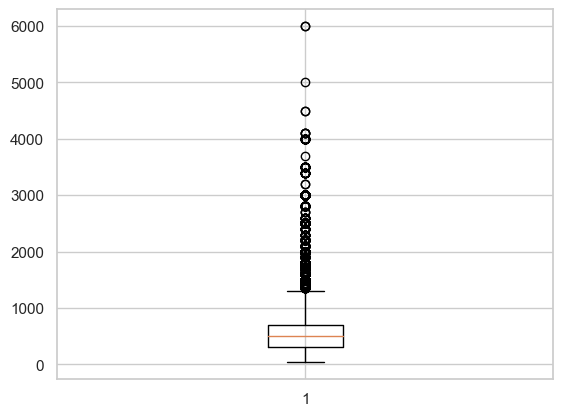

In [68]:
plt.boxplot(df['approx_cost'])
plt.show()

In [71]:
df[df["approx_cost"]>4000]

,online_order_1,book_table_1,listed_in(type)_1,listed_in(type)_2,listed_in(type)_3,listed_in(type)_4,listed_in(type)_5,listed_in(type)_6,listed_in(type)_7,listed_in(city)_1,listed_in(city)_2,listed_in(city)_3,listed_in(city)_4,listed_in(city)_5,listed_in(city)_6,listed_in(city)_7,listed_in(city)_8,listed_in(city)_9,listed_in(city)_10,listed_in(city)_11,listed_in(city)_12,listed_in(city)_13,listed_in(city)_14,listed_in(city)_15,listed_in(city)_16,listed_in(city)_17,listed_in(city)_18,listed_in(city)_19,listed_in(city)_20,listed_in(city)_21,listed_in(city)_22,listed_in(city)_23,listed_in(city)_24,listed_in(city)_25,listed_in(city)_26,listed_in(city)_27,listed_in(city)_28,listed_in(city)_29,listed_in(city)_30,approx_cost,target,multiple_types,total_cuisines
19139,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6000.0,1,1,2
37715,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4100.0,1,1,5
39125,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4100.0,1,1,5
39416,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4100.0,1,1,5
40262,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4100.0,1,1,5
40266,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5000.0,1,1,2
41591,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4500.0,1,1,2
42141,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4500.0,1,1,2
45618,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6000.0,1,1,2


In [72]:
df= df.drop(df[df["approx_cost"] > 4000].index)
df

,online_order_1,book_table_1,listed_in(type)_1,listed_in(type)_2,listed_in(type)_3,listed_in(type)_4,listed_in(type)_5,listed_in(type)_6,listed_in(type)_7,listed_in(city)_1,listed_in(city)_2,listed_in(city)_3,listed_in(city)_4,listed_in(city)_5,listed_in(city)_6,listed_in(city)_7,listed_in(city)_8,listed_in(city)_9,listed_in(city)_10,listed_in(city)_11,listed_in(city)_12,listed_in(city)_13,listed_in(city)_14,listed_in(city)_15,listed_in(city)_16,listed_in(city)_17,listed_in(city)_18,listed_in(city)_19,listed_in(city)_20,listed_in(city)_21,listed_in(city)_22,listed_in(city)_23,listed_in(city)_24,listed_in(city)_25,listed_in(city)_26,listed_in(city)_27,listed_in(city)_28,listed_in(city)_29,listed_in(city)_30,approx_cost,target,multiple_types,total_cuisines
0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800.0,1,1,3
1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800.0,1,1,3
2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800.0,1,2,3
3,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0,1,1,2
4,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,600.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,800.0,1,2,2
51711,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,800.0,0,2,4
51712,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1500.0,0,1,1
51715,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2500.0,1,1,1


In [73]:
df.isnull().sum()

online_order_1        0
book_table_1          0
listed_in(type)_1     0
listed_in(type)_2     0
listed_in(type)_3     0
listed_in(type)_4     0
listed_in(type)_5     0
listed_in(type)_6     0
listed_in(type)_7     0
listed_in(city)_1     0
listed_in(city)_2     0
listed_in(city)_3     0
listed_in(city)_4     0
listed_in(city)_5     0
listed_in(city)_6     0
listed_in(city)_7     0
listed_in(city)_8     0
listed_in(city)_9     0
listed_in(city)_10    0
listed_in(city)_11    0
listed_in(city)_12    0
listed_in(city)_13    0
listed_in(city)_14    0
listed_in(city)_15    0
listed_in(city)_16    0
listed_in(city)_17    0
listed_in(city)_18    0
listed_in(city)_19    0
listed_in(city)_20    0
listed_in(city)_21    0
listed_in(city)_22    0
listed_in(city)_23    0
listed_in(city)_24    0
listed_in(city)_25    0
listed_in(city)_26    0
listed_in(city)_27    0
listed_in(city)_28    0
listed_in(city)_29    0
listed_in(city)_30    0
approx_cost           0
target                0
multiple_types  

## Impute missing data

In [117]:
#we have no missing data

## data scaling

Looking at the data we prepared for training our classification model, it's important to point the need to apply scaling, we will use standard scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

## deal with imbalanced data

SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

In [93]:
df["target"].value_counts()

1    23896
0    17513
Name: target, dtype: int64

In [94]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

# NOW data is ready for the model

try many classification and tune them and choose best one

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Instantiate the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict using the trained model
y_pred_logreg = logreg.predict(X_test)

# Calculate the confusion matrix using y_test and y_pred_logreg
confusion_matrix1 = confusion_matrix(y_test, y_pred_logreg)

# Calculate the accuracy score
accu_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of logreg is {accu_logreg}")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Accuracy of logreg is 0.6465829509780247
Confusion Matrix:
[[2661  922]
 [2005 2694]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.74      0.65      3583
           1       0.75      0.57      0.65      4699

    accuracy                           0.65      8282
   macro avg       0.66      0.66      0.65      8282
weighted avg       0.67      0.65      0.65      8282



### KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# Calculate the confusion matrix using y_test and y_pred_logreg
confusion_matrix2 = confusion_matrix(y_test, y_pred_knn)

# Calculate the accuracy score
accu_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of knn is {accu_knn}")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix2)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy of knn is 0.6137406423569186
Confusion Matrix:
[[2027 1556]
 [1643 3056]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      3583
           1       0.66      0.65      0.66      4699

    accuracy                           0.61      8282
   macro avg       0.61      0.61      0.61      8282
weighted avg       0.61      0.61      0.61      8282



### Naive_bayers

In [99]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model= MultinomialNB()
model.fit(X_train, y_train)
y_pred_model= model.predict(X_test)


# Calculate the confusion matrix using y_test and y_pred_logreg
confusion_matrix3 = confusion_matrix(y_test, y_pred_model)

# Calculate the accuracy score
accu_model = accuracy_score(y_test, y_pred_model)
print(f"Accuracy of model is {accu_model}")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix3)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_model))

Accuracy of model is 0.6256942767447476
Confusion Matrix:
[[2808  775]
 [2325 2374]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.78      0.64      3583
           1       0.75      0.51      0.60      4699

    accuracy                           0.63      8282
   macro avg       0.65      0.64      0.62      8282
weighted avg       0.66      0.63      0.62      8282



### 

## RUNDOM FOREST

In [100]:
# Skicit learn implementation
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifierScikit
# Initiating
rf_scikit = RandomForestClassifierScikit(n_estimators=5, max_features=0.75, max_depth=3, min_samples_split=5)

# Fitting 
rf_scikit.fit(X_train, y_train)
y_pred_rf= rf_scikit.predict(X_test)

# Calculate the confusion matrix using y_test and y_pred_logreg
confusion_matrix4 = confusion_matrix(y_test, y_pred_logreg)

# Calculate the accuracy score
accu_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of rf is {accu_rf}")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix4)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy of rf is 0.6289543588505192
Confusion Matrix:
[[2661  922]
 [2005 2694]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.83      0.66      3583
           1       0.78      0.48      0.59      4699

    accuracy                           0.63      8282
   macro avg       0.67      0.65      0.63      8282
weighted avg       0.68      0.63      0.62      8282



### Let's compare the results. We will create a table for a more comprehensive overview.

In [103]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Calculate evaluation metrics
accu_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
auc_logreg = roc_auc_score(y_test, y_pred_logreg)

# Calculate evaluation metrics for KNN
accu_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)

# Calculate evaluation metrics for Random Forest
accu_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

In [104]:
result_df = pd.DataFrame({
    'Model': ['logreg', 'knn', 'rf'],
    'Score': [accu_logreg, accu_knn, accu_rf],
    'Precision': [precision_logreg, precision_knn, precision_rf],
    'Recall': [recall_logreg, recall_knn, recall_rf],
    'F1-score': [f1_logreg, f1_knn, f1_rf],
    'AUC': [auc_logreg, auc_knn, auc_rf]})
result_df = result_df.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Precision,Recall,F1-score,AUC
Model,,,,,
logreg,0.646583,0.745022,0.573313,0.647986,0.657994
rf,0.628954,0.783869,0.477761,0.593680,0.652500
knn,0.613741,0.662619,0.650351,0.656428,0.608039


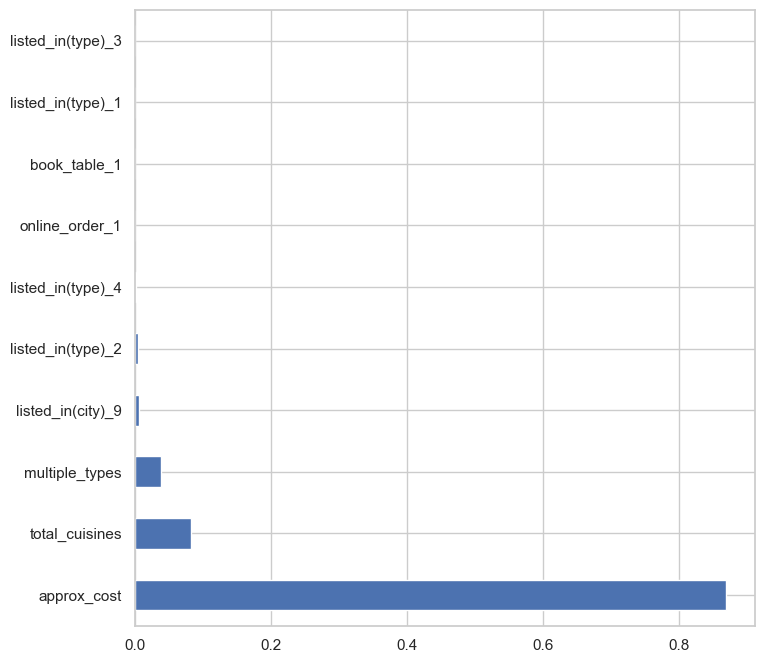

In [106]:
feat_imp = pd.Series(rf_scikit.feature_importances_, index=X.columns)
plt.figure(figsize=(8,8))
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

### hyperparmeter tuning:
        

In [107]:
from sklearn.model_selection import RandomizedSearchCV

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 100, 20))}
Random_search = RandomizedSearchCV(RandomForestClassifier(random_state=1), paramgrid) 

In [108]:
Random_search.fit(X_train, y_train)  

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'n_estimators': [1, 21, 41, 61, 81]})

In [109]:
print("Best Score:", Random_search.best_score_ *100)
print("Best Hyperparameters:", Random_search.best_params_)

Best Score: 67.87784576094973
Best Hyperparameters: {'n_estimators': 61, 'max_depth': 17}


### hyperparameter tunning for logistic regression model

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Define the hyperparameters to tune
hyperparameters = {'penalty': ['l1', 'l2','l3'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


# Use GridSearchCV to search for the best hyperparameters
clf = GridSearchCV(logreg, hyperparameters, cv=5)

# Fit the model with the best hyperparameters
clf.fit(X_train, y_train)

# Print the best hyperparameters and score
print('Best hyperparameters: ', clf.best_params_)
print('Best score: ', clf.best_score_)

Best hyperparameters:  {'C': 1, 'penalty': 'l2'}
Best score:  0.6695579575640591


In [112]:
# Create a new logistic regression object with the best hyperparameters
best_logreg = LogisticRegression(C=1, penalty='l2')

# Fit the model with the training data
best_logreg.fit(X_train, y_train)

# Predict on the test data using the best logistic regression model
y_pred_best_logreg = best_logreg.predict(X_test)


# Evaluate the model on the test data
score = best_logreg.score(X_test, y_test)

# Print the accuracy score
print('Accuracy score on test data:', score)

Accuracy score on test data: 0.6465829509780247


In [113]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# Initialize different classifiers
logreg = LogisticRegression(C=1, penalty='l2')
svc = SVC()
gbm = GradientBoostingClassifier()
mlp = MLPClassifier()

# Define the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('logreg', logreg), ('svc', svc), ('gbm', gbm), ('mlp', mlp)], voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Calculate the accuracy score of the ensemble model
accu_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Accuracy of ensemble model is {accu_ensemble}")

# Print the confusion matrix of the ensemble model
confusion_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix:")
print(confusion_matrix_ensemble)

# Print the classification report of the ensemble model
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble))


Accuracy of ensemble model is 0.6489978266119295
Confusion Matrix:
[[2796  787]
 [2120 2579]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.78      0.66      3583
           1       0.77      0.55      0.64      4699

    accuracy                           0.65      8282
   macro avg       0.67      0.66      0.65      8282
weighted avg       0.68      0.65      0.65      8282



### cross validation

In [114]:
from sklearn.model_selection import KFold

# Define the number of folds
k = 5

# Initialize the cross-validation method
kf = KFold(n_splits=k)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []

# Iterate over each fold
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets for the current fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Initialize and train your model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate the accuracy score for the current fold
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)

# Print the mean accuracy
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.6494727968677829


## project deployment

In [143]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15996 sha256=00340a9436bc29a4e1819ee17cba9f7609a66d1f97ffe3f4330b9bf2294ab74f
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\5f\5d\e6\735a2035d462c371c5be008107f07d9f7607c09ebff11223bf
Successfully built pyngrok


In [117]:
#save model
from sklearn.compose import make_column_transformer
import pickle as pkl
pkl.dump(clf, open("clf.pkl","wb"))

In [118]:
loaded_model = pkl.load(open('clf.pkl', 'rb'))

In [120]:
def preprocess_fit (df, num):
    scaler = StandardScaler()
    transformer = make_column_transformer((scaler, num),remainder ='passthrough', verbose_feature_names_out=False)
    transformer.fit(df[num])
    return transformer

numerical= list (df1.select_dtypes(include= ['number']).columns)
numerical=numerical[:-1]

transformer = preprocess_fit(df, numerical)


pkl.dump(transformer, open('transformer.pkl','wb'))


trans = pkl.load (open('transformer.pkl','rb'))
model= pkl.load(open('clf.pkl', 'rb'))

In [ ]:
# Load your data into a pandas DataFrame
#data = load_data()  # Replace with your data loading code

# Select the features
selected_features = ['online_order', 'book_table', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)', 'approx_cost']
X = data[selected_features]
y = data['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the numerical and categorical feature columns
numerical_cols = ['approx_cost']
categorical_cols = ['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create the pipeline with the preprocessor and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])


In [137]:
pkl.dump(logreg_best,open('logreg_best.pkl','wb'))

In [119]:
# Define the numerical and categorical columns
numerical = list(df.select_dtypes(include='number').columns)
categorical = list(df.select_dtypes(exclude='number').columns)

# Fit the transformer
transformer = make_column_transformer((StandardScaler(), numerical),
                                       (OneHotEncoder(drop='first'), categorical),
                                       remainder='passthrough')
transformer.fit(df)

# Preprocess the new data
df_new_numerical = df_new[numerical]  # Select only the numerical columns
num_cols_transformed = transformer.transform(df_new_numerical)

df_new_categorical = df_new[categorical]  # Select only the categorical columns
cat_cols_transformed = transformer.transform(df_new_categorical)

# Combine the transformed numerical and categorical columns
x_new = np.hstack((num_cols_transformed, cat_cols_transformed))


KeyError: "None of [Index(['online_order_1', 'book_table_1', 'listed_in(type)_1',\n       'listed_in(type)_2', 'listed_in(type)_3', 'listed_in(type)_4',\n       'listed_in(type)_5', 'listed_in(type)_6', 'listed_in(type)_7',\n       'listed_in(city)_1', 'listed_in(city)_2', 'listed_in(city)_3',\n       'listed_in(city)_4', 'listed_in(city)_5', 'listed_in(city)_6',\n       'listed_in(city)_7', 'listed_in(city)_8', 'listed_in(city)_9',\n       'listed_in(city)_10', 'listed_in(city)_11', 'listed_in(city)_12',\n       'listed_in(city)_13', 'listed_in(city)_14', 'listed_in(city)_15',\n       'listed_in(city)_16', 'listed_in(city)_17', 'listed_in(city)_18',\n       'listed_in(city)_19', 'listed_in(city)_20', 'listed_in(city)_21',\n       'listed_in(city)_22', 'listed_in(city)_23', 'listed_in(city)_24',\n       'listed_in(city)_25', 'listed_in(city)_26', 'listed_in(city)_27',\n       'listed_in(city)_28', 'listed_in(city)_29', 'listed_in(city)_30',\n       'approx_cost', 'target', 'multiple_types', 'total_cuisines'],\n      dtype='object')] are in the [columns]"

In [138]:

def preprocess_fit(df, num, cat):
    scaler = StandardScaler()
    encoder = OneHotEncoder(sparse=False, drop='first')
    
    transformer = make_column_transformer((scaler, num), (encoder, cat),remainder='passthrough', verbose_feature_names_out=False)
    
    # Perform one-hot encoding
    encoded_data = encoder.fit_transform(df[cat])
    
    # Create a new DataFrame with the encoded categorical features
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat))
    
    # Concatenate the numerical and encoded categorical features
    transformed_data = pd.concat([df[num], encoded_df], axis=1)
    
    # Fit the transformer on the transformed data
    transformer.fit(transformed_data)
    
    return transformer

numerical = list(df.select_dtypes(include='number').columns)
numerical = numerical[:-1]

categorical = list(df.select_dtypes(exclude='number').columns)

transformer = preprocess_fit(df, numerical, categorical)


In [139]:
with open('transformer.pkl', 'rb') as f:
    transformer = pkl.load(f)

In [140]:
#save transformer
pkl.dump(transformer, open('transformer.pkl','wb'))

In [141]:
trans = pkl.load (open('transformer.pkl','rb'))
model= pkl.load(open('logreg_best.pkl', 'rb'))

In [130]:
pip install --upgrade scikit-learn


     ---------------------------------------- 8.3/8.3 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [106]:
#load model
#inference

In [97]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
     
#convert input to dataframe
df_new= pd.DataFrame({' ':[ ],     })



#load transformer
transformer= pkl.load(open("transformer.pkl",'rb'))


#apply transformer on inputs
X_new= transformer.transform(df_new)


#load model
model= pkl.load(open('model.pkl','rb'))



#predict output
#success_proba= model.predict_proba(X_new)[0][1]*100